# Car Insurance Conversion Classification Prediction Model
----------------------------------
Author: Arpan Sharma and Harsh Tiwari

Prof.: Dr. Mihai Nica

Submitted to: University of Guelph in partial fulfillment of the requirements of DATA*6100

## Goal: Predict whether a customer will opt for buying insurance or not (binary classification)

**Business Constraints:**
- Revenue: $5.50 for each True Positive
- Cost: $1 for each Positive prediction

## Importing relevant libraries

In [2]:
# # List of packages to install
# packages = [
#     "pandas", "numpy", "seaborn", "matplotlib",
#     "statsmodels", "scikit-learn", "xgboost",
#     "imbalanced-learn"
# ]

# # Importing sys for executing pip commands
# import sys
# import subprocess

# # Function to install packages
# def install(package):
#     subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# # Loop through the packages list and install them if not already installed
# for package in packages:
#     try:
#         # If the package is 'dask[dataframe]', import only 'dask' for the check
#         if package == 'dask[dataframe]':
#             __import__('dask')
#         else:
#             __import__(package)
#         print(f"{package} is already installed.")
#     except ImportError:
#         print(f"{package} not found, installing now...")
#         pip3 install(package)


In [316]:
# Data Manipulation and Analysis Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors  # For handling colors in Matplotlib

# Machine Learning and Statistical Modeling Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    mean_absolute_percentage_error, 
    roc_auc_score, 
    roc_curve, 
    classification_report, 
    auc, 
    confusion_matrix,
    precision_recall_curve, 
    average_precision_score
)

# Statistical Modeling
import statsmodels.api as sm

# Utility Libraries
import re
import warnings
from itertools import chain, combinations
from collections import Counter

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Preprocessing
* I have pre-divided data set provided as project files and the description of features as well.
* I will load both of them start the preprocessing of the data, including following steps.
  *  Import the dataset
  *  Look at the dimensions and statistics
  *  Check the data type of various features
  *  Check the distribution of target variable
  *  Handle missing values
  *  Handle outlier
  *  scale the data and balance according to the target class

### Loading the dataset

In [5]:
#Loading Training Dataset
carins_data_test = pd.read_excel('/Users/arpansharma/Desktop/MDS/CIS*6020/Project/AI_Powered_Nutritional_Assistant/car_data/Project2_Test.xlsx')
#Loading Testing Dataset
carins_data_train = pd.read_excel('/Users/arpansharma/Desktop/MDS/CIS*6020/Project/AI_Powered_Nutritional_Assistant/car_data/Project2_Training.xlsx')

### Initial Exploration of data


In [142]:
print(carins_data_train.head())
print(carins_data_test.head())

   quotedate  vehicleyear          vehiclemake  \
0 2016-01-02         2006           VOLKSWAGEN   
1 2016-01-02         2017              HYUNDAI   
2 2016-01-02         2015  CHEVROLET TRUCK/VAN   
3 2016-01-02         2010               TOYOTA   
4 2016-01-04         2013                HONDA   

                        vehiclemodel  annual_km  commute_distance  \
0                       JETTA 2.5 4P    10000.0               NaN   
1                     ELANTRA GL 4DR    20000.0               NaN   
2  SILVERADO 2500 HD LT CREW CAB 4WD    15000.0               NaN   
3                     COROLLA CE 4DR    20000.0              20.0   
4                       CIVIC LX 4DR    30000.0              30.0   

  marking_system tracking_system vehicle_ownership  vehicle_value  ...  \
0            NaN             NaN             Owned         3000.0  ...   
1            NaN             NaN             Owned            1.0  ...   
2            NaN             NaN               NaN            

In [143]:
# As we observed that column names are not same in train and test df so I am Rechecking the column names for test and train dataframe
print("Training DataFrame Columns:")
print(carins_data_train.columns.tolist())
print("Testing DataFrame Columns:")
print(carins_data_test.columns.tolist())

Training DataFrame Columns:
['quotedate', 'vehicleyear', 'vehiclemake', 'vehiclemodel', 'annual_km', 'commute_distance', 'marking_system', 'tracking_system', 'vehicle_ownership', 'vehicle_value', 'vehicleuse', 'gender', 'year_of_birth', 'postal_code', 'area_code', 'years_licensed', 'years_as_principal_driver', 'multi_product', 'marital_status', 'occupation', 'conviction_count_minor_3yrs', 'conviction_count_major_3yrs', 'conviction_count_criminal_3yrs', 'assigned_losses_pd_5yrs', 'suspension_count', 'is_bound', 'marker']
Testing DataFrame Columns:
['quotedate', 'vehicleyear', 'vehiclemake', 'vehiclemodel', 'annual_km', 'commute_distance', 'marking_system', 'tracking_system', 'vehicle_ownership', 'vehicle_value', 'vehicleuse', 'gender', 'year_of_birth', 'postal_code', 'area_code', 'years_licensed', 'years_as_principal_driver', 'multi_product', 'marital_status', 'occupation', 'conviction_count_minor_3yrs', 'conviction_count_major_3yrs', 'conviction_count_criminal_3yrs', 'assigned_losses_p

In [144]:
#Some of the column names in training dataset include underscore
#As names of both test and train df are in same order we are assigning column names of training dataset to testing dataset
carins_data_train.columns = [col.lower() for col in carins_data_train.columns]
carins_data_test.columns = carins_data_train.columns.drop(['is_bound'])
print("Training DataFrame Columns:")
print(carins_data_train.columns.tolist())
print("Testing DataFrame Columns:")
print(carins_data_test.columns.tolist())

Training DataFrame Columns:
['quotedate', 'vehicleyear', 'vehiclemake', 'vehiclemodel', 'annual_km', 'commute_distance', 'marking_system', 'tracking_system', 'vehicle_ownership', 'vehicle_value', 'vehicleuse', 'gender', 'year_of_birth', 'postal_code', 'area_code', 'years_licensed', 'years_as_principal_driver', 'multi_product', 'marital_status', 'occupation', 'conviction_count_minor_3yrs', 'conviction_count_major_3yrs', 'conviction_count_criminal_3yrs', 'assigned_losses_pd_5yrs', 'suspension_count', 'is_bound', 'marker']
Testing DataFrame Columns:
['quotedate', 'vehicleyear', 'vehiclemake', 'vehiclemodel', 'annual_km', 'commute_distance', 'marking_system', 'tracking_system', 'vehicle_ownership', 'vehicle_value', 'vehicleuse', 'gender', 'year_of_birth', 'postal_code', 'area_code', 'years_licensed', 'years_as_principal_driver', 'multi_product', 'marital_status', 'occupation', 'conviction_count_minor_3yrs', 'conviction_count_major_3yrs', 'conviction_count_criminal_3yrs', 'assigned_losses_p

* Removing duplicated rows from training dataframe. But not from Test data as its linked with leaderboad and the predictions count and arrangement may change.

In [145]:
# Check for duplicate rows considering all columns including 'quotedate'
duplicate_rows = carins_data_train.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows (including 'quotedate'): {num_duplicate_rows}")

# Optionally, display the duplicate rows
if num_duplicate_rows > 0:
    print("Duplicate Rows:")
    print(carins_data_train[duplicate_rows])

# Removing duplicate rows, considering all columns and keeping the first occurrence
carins_data_train = carins_data_train.drop_duplicates(keep='first')

# Verify changes by checking the size of the DataFrame
print(f"Data size after removing duplicates: {carins_data_train.shape}")

Number of duplicate rows (including 'quotedate'): 0
Data size after removing duplicates: (101886, 27)


In [146]:
# Add a marker to distinguish between the training and test datasets
carins_data_train['marker'] = 1 # 1 for train
carins_data_test['marker'] = 0  # 0 for test

In [147]:
# Combine the datasets
combined_data = pd.concat([carins_data_train, carins_data_test], axis=0, ignore_index=True)

#this command was suggested to me by ChatGPT"

In [148]:
combined_data.shape

(117000, 27)

In [149]:
#Checking for data type of the features in the dataset
data_types = combined_data.dtypes

# Group features by their data type
grouped_data_types = data_types.groupby(data_types).groups

# Print the data types and corresponding features
for data_type, features in grouped_data_types.items():
    # Join the feature names into a comma-separated string
    features_list = ', '.join(features)
    print(f"{data_type}: {features_list}")

datetime64[ns]: quotedate
int64: vehicleyear, year_of_birth, conviction_count_minor_3yrs, conviction_count_major_3yrs, conviction_count_criminal_3yrs, assigned_losses_pd_5yrs, suspension_count, marker
float64: annual_km, commute_distance, vehicle_value, years_licensed, years_as_principal_driver, is_bound
object: vehiclemake, vehiclemodel, marking_system, tracking_system, vehicle_ownership, vehicleuse, gender, postal_code, area_code, multi_product, marital_status, occupation


In [150]:
# Summary statistics for numerical features
print(combined_data.describe())

# Display the first few rows to get a feel for the data
print(combined_data.head())

                           quotedate    vehicleyear      annual_km  \
count                         117000  117000.000000  116999.000000   
mean   2016-08-04 01:37:09.415384576    2008.972222   14902.108582   
min              2016-01-02 00:00:00    1930.000000       0.000000   
25%              2016-05-04 00:00:00    2006.000000   10000.000000   
50%              2016-07-28 00:00:00    2010.000000   15000.000000   
75%              2016-10-31 00:00:00    2014.000000   20000.000000   
max              2017-02-27 00:00:00    2019.000000  500000.000000   
std                              NaN       5.811996    8515.391924   

       commute_distance  vehicle_value  year_of_birth  years_licensed  \
count      76397.000000   42171.000000  117000.000000   116989.000000   
mean          44.857900   20757.876550    2001.578667       20.734599   
min            0.000000       0.000000    1900.000000        0.000000   
25%            7.000000    5000.000000    1962.000000        6.000000   
50% 

### Distribution of Target variable

/var/folders/2_/6f0pjncx2gxbv5z61bz_4l8c0000gn/T/ipykernel_53801/3578928376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


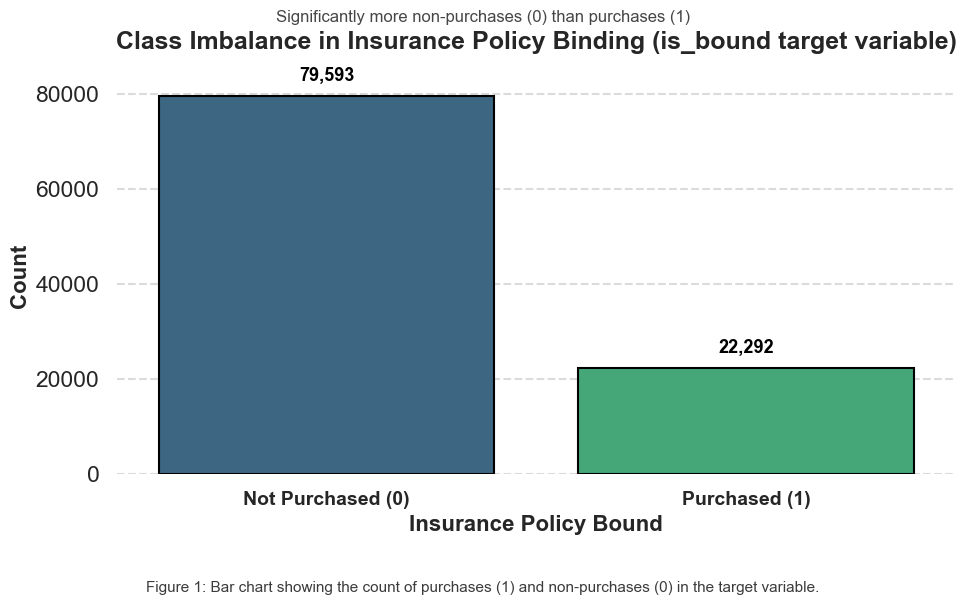

In [141]:
# Set style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plotting the distribution of the target variable with an enhanced visual appearance
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='is_bound',
    data=combined_data,
    palette="viridis",  # Using a more vibrant color palette
    edgecolor='black'  # Adding borders to bars for better contrast
)

# Title and subtitles with better formatting
plt.title('Class Imbalance in Insurance Policy Binding (is_bound target variable)', fontsize=18, pad=20, weight='bold')
plt.suptitle('Significantly more non-purchases (0) than purchases (1)', fontsize=12, y=0.92, alpha=0.85)

# Removing unnecessary axes for a cleaner look
sns.despine(left=True, bottom=True)

# Adding annotations with improved positioning and font
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',  # Adding commas for better readability of large numbers
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                color='black', fontsize=13,
                weight='bold', xytext=(0, 8), textcoords='offset points')

# Enhancing label readability
plt.xlabel('Insurance Policy Bound', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')
plt.xticks([0, 1], ['Not Purchased (0)', 'Purchased (1)'], fontsize=14, weight='bold')

# Adding gridlines for better readability of counts
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit titles, labels, and annotations neatly
plt.tight_layout()

# Adding a caption to provide more context
plt.figtext(0.5, -0.05, 'Figure 1: Bar chart showing the count of purchases (1) and non-purchases (0) in the target variable.', ha='center', fontsize=11, alpha=0.9)

# Show the plot
plt.show()


### Handling missing data

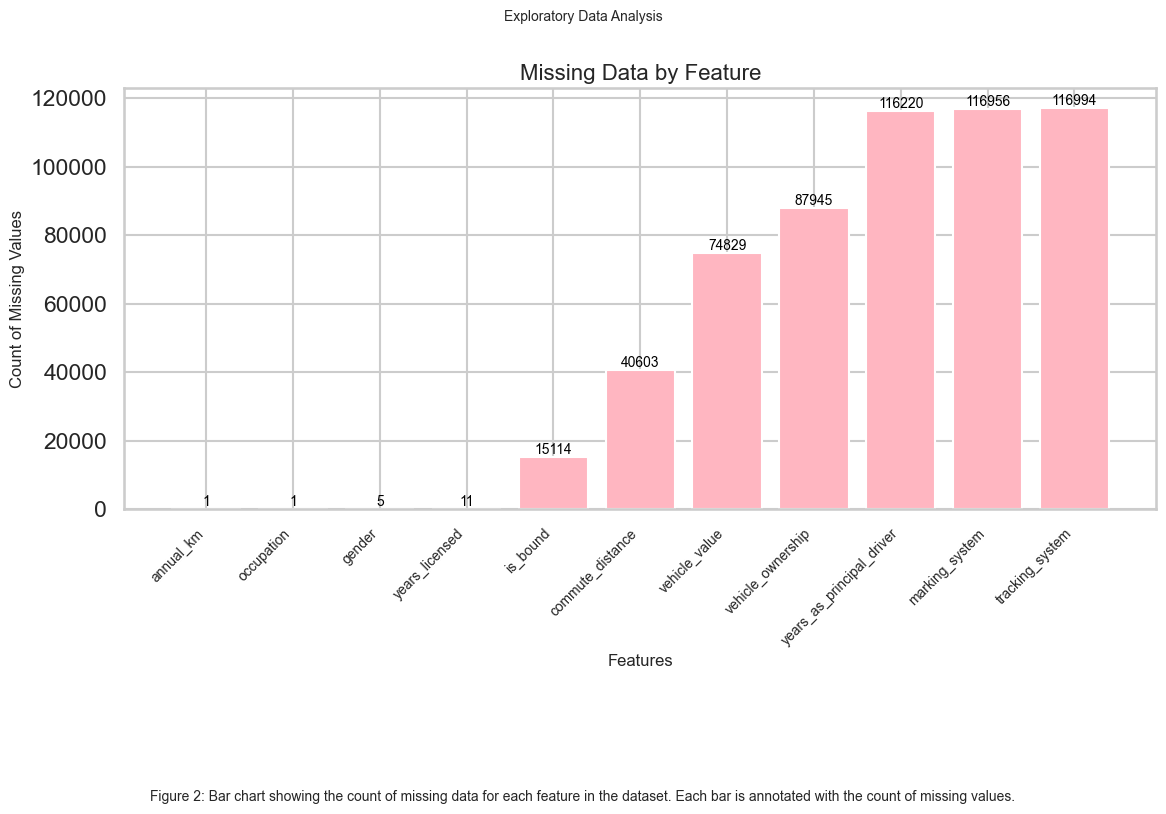

In [151]:
# Visualize missing data
missing = combined_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

# Plotting the missing data counts
plt.figure(figsize=(12, 7))
bars = plt.bar(missing.index, missing.values, color='lightpink')
plt.title('Missing Data by Feature', fontsize=16)
plt.suptitle('Exploratory Data Analysis', fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability

# Adding text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Adjust layout to fit titles, labels, and annotations neatly
plt.tight_layout()
plt.figtext(0.5, -0.15, 'Figure 2: Bar chart showing the count of missing data for each feature in the dataset. Each bar is annotated with the count of missing values.', ha='center', fontsize=10)  # Caption
plt.show()



* From the visualization, lets ignore is_bound column as it has null values from test set.
* I have decided to drop years_ad_principal_driver column as it has more than 99% nulls.

In [152]:
combined_data.drop('years_as_principal_driver', axis=1, inplace=True)

* According to Data Dictionary marking_system and tracking_system features indicate "Required for rating the prevention discount", So, I have converted them into Binary features.

In [153]:
features_ms_ts = ['marking_system', 'tracking_system']

# Convert these features to binary indicators
for feature in features_ms_ts:
    combined_data[feature + '_Exists'] = combined_data[feature].notna().astype(int)

# Drop the original columns
combined_data.drop(columns=features_ms_ts, inplace=True)

* There is only one na value in annual_km column, I have decided to drop row.

In [154]:
# Drop rows where 'annual_km' is null
combined_data = combined_data.dropna(subset=['annual_km'])

* Gender has 'Unknown' category in the dataset so I am replacing NA values with that. Similarly Occupation feature has 'Not Known', so I have replaced NA with that.

In [155]:
# Replace NA values in 'Gender' column with 'Unknown'
combined_data['gender'] = combined_data['gender'].fillna('Unknown')


In [156]:
combined_data['occupation'] = combined_data['occupation'].fillna('Not Known')

* To address missing values in the commute_distance column, I imputed them based on the median commute distances associated with each category in the vehicleuse column. This method ensures that the imputed values are representative of typical commute distances for each type of vehicle usage.

In [157]:
# Calculate the median 'commute_distance' for each category in 'vehicleuse'
medians_by_vehicle_use = combined_data.groupby('vehicleuse')['commute_distance'].median()

# Function to apply median imputation based on 'vehicleuse'
def impute_commute_distance(row):
    if pd.isna(row['commute_distance']):
        # Check if the vehicle use category exists in the median mapping
        if row['vehicleuse'] in medians_by_vehicle_use:
            return medians_by_vehicle_use[row['vehicleuse']]
        else:
            # Optional: Handle the case where no median is available for the vehicle use category
            return np.nan  # Or specify a default value such as 0 or the overall median
    else:
        return row['commute_distance']

# Apply the imputation
combined_data['commute_distance'] = combined_data.apply(impute_commute_distance, axis=1)

* In vehicle_ownership, I have made a new category unknown to represent null vals.

In [158]:
combined_data['vehicle_ownership'] = combined_data['vehicle_ownership'].fillna('Unknown')

* Now, I am handling null vals of vehicle_value by imputing it with median values of similar vehicle from vehicle_make and vehicle_model columns. For this I have cleaned the vehicle_make column.

In [159]:
combined_data['vehiclemake'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'CHEVROLET TRUCK/VAN', 'TOYOTA', 'HONDA',
       'PONTIAC TRUCK/VAN', 'KIA TRUCK/VAN', 'SMART', 'MAZDA',
       'HONDA TRUCK/VAN', 'BUICK TRUCK/VAN', 'CHEVROLET',
       'FORD TRUCK/VAN', 'TOYOTA TRUCK/VAN', 'LINCOLN TRUCK/VAN',
       'DODGE/RAM TRUCK/VAN', 'NISSAN', 'JEEP', 'MERCEDES-BENZ',
       'PONTIAC', 'INFINITI TRUCK/VAN', 'FORD', 'KIA', 'CHRYSLER', 'MINI',
       'SUBARU', 'ACURA', 'BMW TRUCK/VAN', 'GMC TRUCK/VAN', 'VOLVO',
       'BUICK', 'VOLKSWAGEN TRUCK/VAN', 'HYUNDAI TRUCK/VAN',
       'MERCURY TRUCK/VAN', 'NISSAN TRUCK/VAN', 'PORSCHE', 'BMW',
       'MAZDA TRUCK/VAN', 'LAND ROVER', 'DODGE', 'LEXUS TRUCK/VAN',
       'AUDI TRUCK/VAN', 'CADILLAC', 'SUZUKI', 'MERCEDES-BENZ TRUCK',
       'SATURN', 'BENTLEY', 'LEXUS', 'VOLVO TRUCK/VAN', 'SAAB', 'LINCOLN',
       'OLDSMOBILE', 'MITSUBISHI', 'AUDI', 'INFINITI',
       'MITSUBISHI TRUCK/VAN', 'MAZDA3', 'FIAT', 'JAGUAR TRUCK/VAN',
       'CHRYSLER TRUCK/VAN', 'SCION', 'SATURN TRUCK/VAN', 'JAGUAR'

In [160]:
# List of standard vehicle makes in uppercase
standard_makes = [
    'ACURA', 'ALFA ROMEO', 'AMERICAN MOTORS', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
    'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FERRARI', 'FIAT', 'FORD',
    'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI',
    'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY',
    'MINI', 'MITSUBISHI', 'NISSAN', 'OLDSMOBILE', 'PEUGEOT', 'PLYMOUTH', 'PONTIAC',
    'PORSCHE', 'RAM', 'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU', 'SUZUKI', 'TESLA',
    'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'YAMAHA', 'HARLEY-DAVIDSON', 'HUMMER', 'DAEWOO',
    'FREIGHTLINER', 'KENWORTH', 'INTERNATIONAL', 'MACK', 'PETERBILT', 'STERLING', 'WESTERN STAR',
    'MOBILITY VENTURES', 'AM GENERAL', 'ROLLS-ROYCE', 'MG', 'TRIUMPH', 'BOMBARDIER',
    'CAN-AM', 'POLARIS', 'INDIAN MOTORCYCLE', 'KTM', 'DUCATI', 'PIAGGIO', 'VESPA',
    'SKI-DOO', 'SEA-DOO', 'HINO', 'GEO', 'FISKER', 'MCLAREN', 'WILLYS', 'DAIHATSU',
    'LADA', 'BLUE BIRD', 'GULF STREAM', 'JOHN DEERE', 'ROYAL ENFIELD', 'AUSTIN-HEALEY',
    'AC', 'MONACO', 'TRIPLE E', 'SPRINGDALE', 'FOREST RIVER', 'COACHMEN', 'ROADTREK'
]

# Create a pattern that matches any of the standard makes
make_pattern = r'\b(' + '|'.join(standard_makes) + r')\b'

# Function to clean and standardize vehicle makes using regex
def clean_vehicle_make_regex(make):
    if pd.isnull(make):
        return np.nan
    make = str(make).upper().strip()

    # Remove unwanted suffixes
    make = re.sub(r'\b(TRUCK/VAN|CAMION/VAN|CAMION/VA|CAMION/V|TRUCK|VAN|CAR|CARAVAN)\b', '', make)

    # Remove any non-alphanumeric characters except spaces
    make = re.sub(r'[^A-Z0-9\s]', '', make)

    # Correct common misspellings using regex substitutions
    make = re.sub(r'\bCHEVY?\b', 'CHEVROLET', make)
    make = re.sub(r'\bCHEVRO?LET\b', 'CHEVROLET', make)
    make = re.sub(r'\bCH[EA]R?VO?LET\b', 'CHEVROLET', make)
    make = re.sub(r'\bCH[EA]VRO?LET\b', 'CHEVROLET', make)
    make = re.sub(r'\bCH?RSY?LER\b', 'CHRYSLER', make)
    make = re.sub(r'\bH[UYN]{1,3}DAI\b', 'HYUNDAI', make)
    make = re.sub(r'\bNISS?[AI]?[AN]\b', 'NISSAN', make)
    make = re.sub(r'\bTOY[O0]?[AO]?TA\b', 'TOYOTA', make)
    make = re.sub(r'\bVOLK?[SW]{1,2}AG[AE]N\b', 'VOLKSWAGEN', make)
    make = re.sub(r'\bMER[SC]?[EA]D[EA]S[\s-]*BENZ\b', 'MERCEDES-BENZ', make)
    make = re.sub(r'\bACURA?\b', 'ACURA', make)
    make = re.sub(r'\bINFIN?[IY]TI\b', 'INFINITI', make)
    make = re.sub(r'\bPOR?SC?HE\b', 'PORSCHE', make)
    make = re.sub(r'\bMA[ZS]{1,2}DA\b', 'MAZDA', make)
    make = re.sub(r'\bMIT[SA][SB][IU][BS]HI\b', 'MITSUBISHI', make)
    make = re.sub(r'\bPON[TIA]{2,4}C\b', 'PONTIAC', make)
    make = re.sub(r'\bDODG?E\b', 'DODGE', make)
    make = re.sub(r'\bJEE[P]{1,2}\b', 'JEEP', make)
    make = re.sub(r'\bHUM+ER\b', 'HUMMER', make)
    make = re.sub(r'\bLEXU[CS]\b', 'LEXUS', make)
    make = re.sub(r'\bBM[WX]\b', 'BMW', make)
    make = re.sub(r'\bHON?DA\b', 'HONDA', make)
    make = re.sub(r'\bGEO\b', 'GEO', make)
    make = re.sub(r'\bAMC\b', 'AMERICAN MOTORS', make)
    make = re.sub(r'\bVW\b', 'VOLKSWAGEN', make)
    make = re.sub(r'\bFORD[ -]?F[ -]?150\b', 'FORD', make)
    make = re.sub(r'\bF[ -]?150\b', 'FORD', make)
    make = re.sub(r'\bF[ -]?250\b', 'FORD', make)
    make = re.sub(r'\bE[ -]?350\b', 'FORD', make)
    make = re.sub(r'\b1FTFW1EF8BFA01523\b', 'FORD', make)
    make = re.sub(r'\b2X+\b', 'NISSAN', make)
    make = re.sub(r'\bHARLEY DAVIDSON\b', 'HARLEY-DAVIDSON', make)
    make = re.sub(r'\bME?R[CS]?E[CD]E[ZS]?\b', 'MERCEDES-BENZ', make)
    make = re.sub(r'\bROL[LS]{1,2}[ -]?ROYCE\b', 'ROLLS-ROYCE', make)
    make = re.sub(r'\bBOMBA?D[IE]+R\b', 'BOMBARDIER', make)
    make = re.sub(r'\bHYN?D[AE]I\b', 'HYUNDAI', make)
    make = re.sub(r'\bINFIN[IA]TY\b', 'INFINITI', make)
    make = re.sub(r'\bNISS?[IA]N\b', 'NISSAN', make)
    make = re.sub(r'\bTRI[UA]MF\b', 'TRIUMPH', make)
    make = re.sub(r'\bMOBILITY VENTURES\b', 'MOBILITY VENTURES', make)
    make = re.sub(r'\bDAIMLER\b', 'DAIMLER', make)
    make = re.sub(r'\bCATERPILLAR\b', 'CATERPILLAR', make)
    make = re.sub(r'\bCAR\b', 'UNKNOWN', make)
    make = re.sub(r'\bUNDISCLOSED\b', 'UNKNOWN', make)
    make = re.sub(r'\bUNKNOWN\b', 'UNKNOWN', make)
    make = re.sub(r'\bMAILBOU\b', 'UNKNOWN', make)
    make = re.sub(r'\bCONVERTED\b', 'UNKNOWN', make)
    make = re.sub(r'\bHINO\b', 'HINO', make)
    make = re.sub(r'\bJOHN DEERE\b', 'JOHN DEERE', make)
    make = re.sub(r'\bPOLARIS\b', 'POLARIS', make)
    make = re.sub(r'\bCAN[ -]?AM\b', 'CAN-AM', make)
    make = re.sub(r'\bARTI?C[ -]?CAT\b', 'ARCTIC CAT', make)
    make = re.sub(r'\bSKI[ -]?DOO\b', 'SKI-DOO', make)
    make = re.sub(r'\bBLUE BIRD\b', 'BLUE BIRD', make)
    make = re.sub(r'\bGULF STREAM\b', 'GULF STREAM', make)
    make = re.sub(r'\bROADTREK\b', 'ROADTREK', make)
    make = re.sub(r'\bROYAL ENFIELD\b', 'ROYAL ENFIELD', make)
    make = re.sub(r'\bSPRINGDALE\b', 'SPRINGDALE', make)
    make = re.sub(r'\bFOREST RIVER\b', 'FOREST RIVER', make)
    make = re.sub(r'\bCOACHMEN\b', 'COACHMEN', make)
    make = re.sub(r'\bTRIPLE[ -]?E\b', 'TRIPLE E', make)
    make = re.sub(r'\bROADTREK\b', 'ROADTREK', make)
    make = re.sub(r'\bWILLYS\b', 'WILLYS', make)
    make = re.sub(r'\bDAIH?ATSU\b', 'DAIHATSU', make)
    make = re.sub(r'\bLAMB?ORGHINI\b', 'LAMBORGHINI', make)
    make = re.sub(r'\bFERRARI\b', 'FERRARI', make)
    make = re.sub(r'\bMASERATI\b', 'MASERATI', make)
    make = re.sub(r'\bMCLAREN\b', 'MCLAREN', make)
    make = re.sub(r'\bFISKER\b', 'FISKER', make)
    make = re.sub(r'\bBENTLEY\b', 'BENTLEY', make)
    make = re.sub(r'\bASTON MARTIN\b', 'ASTON MARTIN', make)
    make = re.sub(r'\bALFA ROMEO\b', 'ALFA ROMEO', make)
    make = re.sub(r'\bMG\b', 'MG', make)
    make = re.sub(r'\bTRIUMPH\b', 'TRIUMPH', make)
    make = re.sub(r'\bAC\b', 'AC', make)
    make = re.sub(r'\bAUSTIN[ -]?HEALEY\b', 'AUSTIN-HEALEY', make)
    make = re.sub(r'\bROYAL\b', 'ROYAL ENFIELD', make)
    make = re.sub(r'\bMONACO\b', 'MONACO', make)
    make = re.sub(r'\bSPRINGDALE\b', 'SPRINGDALE', make)
    make = re.sub(r'\bDAEWOO\b', 'DAEWOO', make)
    make = re.sub(r'\bPETERBILT\b', 'PETERBILT', make)
    make = re.sub(r'\bSTERLING\b', 'STERLING', make)
    make = re.sub(r'\bWESTERN STAR\b', 'WESTERN STAR', make)

    # Remove extra spaces
    make = re.sub(r'\s+', ' ', make).strip()

    # Extract the vehicle make from the standard makes list
    match = re.search(make_pattern, make)
    if match:
        return match.group(0)
    else:
        # If no match, return 'UNKNOWN'
        return 'UNKNOWN'

# Apply the function directly to the vehiclemake column
combined_data['vehiclemake'] = combined_data['vehiclemake'].apply(clean_vehicle_make_regex)

In [161]:
group_medians = combined_data.groupby(['vehiclemake', 'vehiclemodel'])['vehicle_value'].median()

# Calculate medians for each vehicle make
make_medians = combined_data.groupby('vehiclemake')['vehicle_value'].median()

# Overall median
overall_median = combined_data['vehicle_value'].median()

# First pass: Fill using group medians
combined_data['vehicle_value'] = combined_data.apply(
    lambda row: group_medians.get((row['vehiclemake'], row['vehiclemodel']), np.nan) if pd.isna(row['vehicle_value']) else row['vehicle_value'],
    axis=1
)

# Second pass: Use make medians where group medians failed
combined_data['vehicle_value'] = combined_data.apply(
    lambda row: make_medians[row['vehiclemake']] if pd.isna(row['vehicle_value']) else row['vehicle_value'],
    axis=1
)

# Final pass: Use the overall median where make medians failed
combined_data['vehicle_value'] = combined_data['vehicle_value'].fillna(overall_median)

* Dropping vehiclemodel column after imputing vehicle value as it has more than 5000 unique categories which can lead to overfitting in the model.

In [162]:
combined_data.drop('vehiclemodel', axis=1, inplace=True)

### Handling Year Related data


* I have calculated age from year_of_birth by subtracting it from year of insuarance quotation. Then I dropped that column and dropped quotedate feature as its mostly from year 2016 so It wont make a difference to model.


In [163]:
combined_data['quotedate'] = pd.to_datetime(combined_data['quotedate'])

# Making new column ageatquote
# Extract year, month, day, and whether it's a weekend
combined_data['quoteYear'] = combined_data['quotedate'].dt.year
combined_data['ageatquote'] = combined_data['quoteYear'] - combined_data['year_of_birth']
#making new column vehicleage according to qoutation year
combined_data['vehicleage'] = combined_data['quoteYear'] - combined_data['vehicleyear']

In [164]:
# Calculate the median ageatquote for each gender
median_ageatquote_per_gender = combined_data.groupby('gender')['ageatquote'].median()
overall_median = combined_data.loc[combined_data['gender'].isin(['Female', 'Male']), 'ageatquote'].median()
# Set the median for "Unknown" to the overall median
median_ageatquote_per_gender['Unknown'] = overall_median

# Define a robust function to handle outliers in ageatquote
def replace_extreme_outliers(row):
    if row['ageatquote'] < 0 or row['ageatquote'] > 100:
        # Replace using gender-specific median, or use the overall median if gender is missing or not in the index
        replacement_value = median_ageatquote_per_gender.get(row['gender'], combined_data['ageatquote'].median())
        return replacement_value
    return row['ageatquote']

# Apply the function to the ageatquote column
combined_data['ageatquote'] = combined_data.apply(replace_extreme_outliers, axis=1)

* I tackled missing values in the years_licensed column by imputing them based on the median years licensed for different age groups specified by the ageatquote column. This approach allows the imputed values to reflect the expected licensing duration for individuals at varying ages, ensuring a more accurate and representative dataset.

In [165]:
# Calculate the median 'years_licensed' for each 'ageatquote'
medians_by_age = combined_data.groupby('ageatquote')['years_licensed'].median()

# Function to apply median imputation
def impute_years_licensed(row):
    if pd.isna(row['years_licensed']):
        # Check if the age group exists in the median mapping
        if row['ageatquote'] in medians_by_age:
            return medians_by_age[row['ageatquote']]
        else:
            # Optional: Handle the case where no median is available for the age group
            return np.nan  # Or specify a default value
    else:
        return row['years_licensed']

# Apply the imputation
combined_data['years_licensed'] = combined_data.apply(impute_years_licensed, axis=1)

In [166]:
combined_data.drop(['quotedate','year_of_birth','quoteYear','vehicleyear'], axis=1, inplace=True)

* Data including features like YrSold, MoSold, YearBuilt, and YearRemodAdd. I have used these features and combined them to make new feature.
 1. AgeAtSale : This feature represents Age of the house at date of Sale.
 2. YearsSinceRenovation: This feature represents Age of house since last renovation.

### Handling location based data

* First, I Cleaned raw location data by validating and removing invalid postal/area codes based on Canadian postal/area code patterns
* Then, I Created a comprehensive mapping system for postal codes (first letter → province, second character → urban/rural) and area codes (grouped by geographical regions)

**New Columns:**
1. **postal_region**: Combines province/territory derived from the first letter of postal codes with urban/rural classification from the second character. Format: [Region]_[Urban/Rural]
  - Example: "Ontario_Toronto_Urban" indicates an urban area in Toronto, Ontario

2. **area_region**: Groups area codes into key geographical regions and metropolitan areas.
  - Example: "Ontario_GTA" represents area codes from Greater Toronto Area

3. **consolidated_region**: Simplified regional classification using postal code as primary source and area code as backup when postal information is unavailable.
  - Example: "Ontario", "Quebec", "West_BC", etc.



In [167]:
# Clean postal codes and area codes in a DataFrame by setting invalid entries to None.
def clean_location_data(df, postal_col, area_col):

    def is_valid_postal_code(code):
        if pd.isna(code) or not isinstance(code, str):
            return False
        # Check if the code contains at least one letter
        return bool(re.search('[A-Za-z]', str(code)))

    def is_valid_area_code(code):
        if pd.isna(code):
            return False
        if isinstance(code, str) and code == 'Unk':
            return False
        try:
            # Convert to string, remove any spaces or special characters
            code_str = str(code).strip().replace('-', '').replace(' ', '')
            # Check if it's a 3-digit number
            return code_str.isdigit() and len(code_str) == 3
        except:
            return False

    # Store original counts of valid/invalid entries
    total_records = len(df)

    # Store original length
    original_length = len(df)

    # Create masks for valid entries
    valid_postal = df[postal_col].apply(is_valid_postal_code)
    valid_area = df[area_col].apply(is_valid_area_code)

    # Store invalid entries before cleaning
    invalid_postal = df.loc[~valid_postal, postal_col].value_counts().head()
    invalid_area = df.loc[~valid_area, area_col].value_counts().head()

    # Set invalid entries to None
    df.loc[~valid_postal, postal_col] = None
    df.loc[~valid_area, area_col] = None

    # Print cleaning summary
    print("Cleaning Summary:")
    print(f"Total records: {total_records}")
    print(f"Original row count: {original_length}")
    print(f"Rows removed: {original_length - len(df)}")

    print(f"\nPostal Codes ({postal_col}):")
    print(f"Valid entries: {valid_postal.sum()}")
    print(f"Set to None: {(~valid_postal).sum()}")
    if len(invalid_postal) > 0:
        print("\nInvalid postal codes that were set to None:")
        print(invalid_postal)

    print(f"\nArea Codes ({area_col}):")
    print(f"Valid entries: {valid_area.sum()}")
    print(f"Set to None: {(~valid_area).sum()}")
    if len(invalid_area) > 0:
        print("\nInvalid area codes that were set to None:")
        print(invalid_area)

    # Show sample of remaining valid entries
    print("\nSample of valid postal codes:")
    print(df.loc[valid_postal, postal_col].value_counts().head())

    print("\nSample of valid area codes:")
    print(df.loc[valid_area, area_col].value_counts().head())

# Example usage:
clean_location_data(combined_data, 'postal_code', 'area_code')

Cleaning Summary:
Total records: 116999
Original row count: 116999
Rows removed: 0

Postal Codes (postal_code):
Valid entries: 116972
Set to None: 27

Invalid postal codes that were set to None:
postal_code
911    2
496    2
483    1
495    1
786    1
Name: count, dtype: int64

Area Codes (area_code):
Valid entries: 115303
Set to None: 1696

Invalid area codes that were set to None:
area_code
Unk    1694
40        1
50        1
Name: count, dtype: int64

Sample of valid postal codes:
postal_code
K0A    1279
A0A    1248
N0G    1064
A0G    1057
Y1A     981
Name: count, dtype: int64

Sample of valid area codes:
area_code
519    16284
613    14326
647    12530
905    11393
709    11130
Name: count, dtype: int64


In [168]:
# Bin Canadian postal codes by province/territory and urban/rural status
def bin_postal_codes(postal_code):
    """
    First letter indicates province/territory:
    A: Newfoundland and Labrador
    B: Nova Scotia
    C: Prince Edward Island
    E: New Brunswick
    G-H: Quebec
    J: Quebec
    K-P: Ontario
    R: Manitoba
    S: Saskatchewan
    T: Alberta
    V: British Columbia
    X: Northwest Territories and Nunavut
    Y: Yukon
    """
    # Extract first letter
    if not isinstance(postal_code, str):
        return 'Unknown'

    first_letter = postal_code[0].upper()

    # Define province/region mappings
    province_map = {
        'A': 'Atlantic_NL',
        'B': 'Atlantic_NS',
        'C': 'Atlantic_PEI',
        'E': 'Atlantic_NB',
        'G': 'Quebec_East',
        'H': 'Quebec_Montreal',
        'J': 'Quebec_West',
        'K': 'Ontario_East',
        'L': 'Ontario_Central',
        'M': 'Ontario_Toronto',
        'N': 'Ontario_Southwest',
        'P': 'Ontario_North',
        'R': 'Manitoba',
        'S': 'Saskatchewan',
        'T': 'Alberta',
        'V': 'British_Columbia',
        'X': 'Northern_NWT_NU',
        'Y': 'Northern_Yukon'
    }

    # Second character indicates urban (1) or rural (0)
    try:
        second_char = postal_code[1]
        urban_rural = 'Urban' if second_char.isdigit() else 'Rural'
    except:
        urban_rural = 'Unknown'

    province = province_map.get(first_letter, 'Unknown')
    return f"{province}_{urban_rural}"

# Bin area codes by region and type
def bin_area_codes(area_code):

    if not isinstance(area_code, (int, str)) or str(area_code) == 'Unk':
        return 'Unknown'

    area_code = str(area_code)

    # Canadian area code mappings
    region_map = {
        # Ontario
        'Ontario_GTA': ['416', '647', '437', '905', '289', '365'],
        'Ontario_East': ['613', '343'],
        'Ontario_South': ['519', '226', '548'],
        'Ontario_North': ['705', '249'],

        # Quebec
        'Quebec_Montreal': ['514', '438', '450'],
        'Quebec_Other': ['418', '581', '819', '873'],

        # Western Canada
        'West_BC': ['604', '778', '250', '236', '672'],
        'West_AB': ['403', '587', '780', '825'],
        'West_SK_MB': ['306', '639', '204', '431'],

        # Atlantic Canada
        'Atlantic': ['902', '782', '506', '709'],

        # Northern Canada
        'Northern': ['867']
    }

    # Find the region for the area code
    for region, codes in region_map.items():
        if area_code in codes:
            return region

    # If it's not a Canadian area code, check if it's US
    if len(area_code) == 3 and area_code.isdigit():
        return 'International_US'

    return 'International_Other'

# Process both postal codes and area codes in a dataframe.
def process_location_data(df, postal_col='postal_code', area_col='area_code'):
    # Add binned columns directly to the input DataFrame
    df['postal_region'] = df[postal_col].apply(bin_postal_codes)
    df['area_region'] = df[area_col].apply(bin_area_codes)

    # Create consolidated region (uses postal code as primary, area code as backup)
    df['consolidated_region'] = df['postal_region'].apply(lambda x: x.split('_')[0])
    mask = df['consolidated_region'] == 'Unknown'
    df.loc[mask, 'consolidated_region'] = df.loc[mask, 'area_region'].apply(lambda x: x.split('_')[0])

    # Print summary of the binning results
    print("\nRegion Distribution:")
    print("\nPostal Regions:")
    print(df['postal_region'].value_counts().head())
    print("\nArea Code Regions:")
    print(df['area_region'].value_counts().head())
    print("\nConsolidated Regions:")
    print(df['consolidated_region'].value_counts().head())

# Then process/bin the cleaned data
process_location_data(combined_data, 'postal_code', 'area_code')


Region Distribution:

Postal Regions:
postal_region
Ontario_Central_Urban      28587
Ontario_Southwest_Urban    20874
Ontario_East_Urban         17559
Ontario_Toronto_Urban      11883
Atlantic_NL_Urban          11579
Name: count, dtype: int64

Area Code Regions:
area_region
Ontario_GTA      37448
Atlantic         26201
Ontario_South    19475
Ontario_East     14556
Ontario_North    10431
Name: count, dtype: int64

Consolidated Regions:
consolidated_region
Ontario     86314
Atlantic    27302
Northern     1535
Quebec        865
Alberta       540
Name: count, dtype: int64


In [169]:
combined_data.drop(['area_code', 'postal_code'], axis=1, inplace=True)

### Handling Outliers from training dataframe

* Plotting box plot to see outliers of various numerical features which may have outliers

In [170]:
out_train_data = combined_data[combined_data['marker'] == 1].copy()
out_test_data = combined_data[combined_data['marker'] == 0].copy()

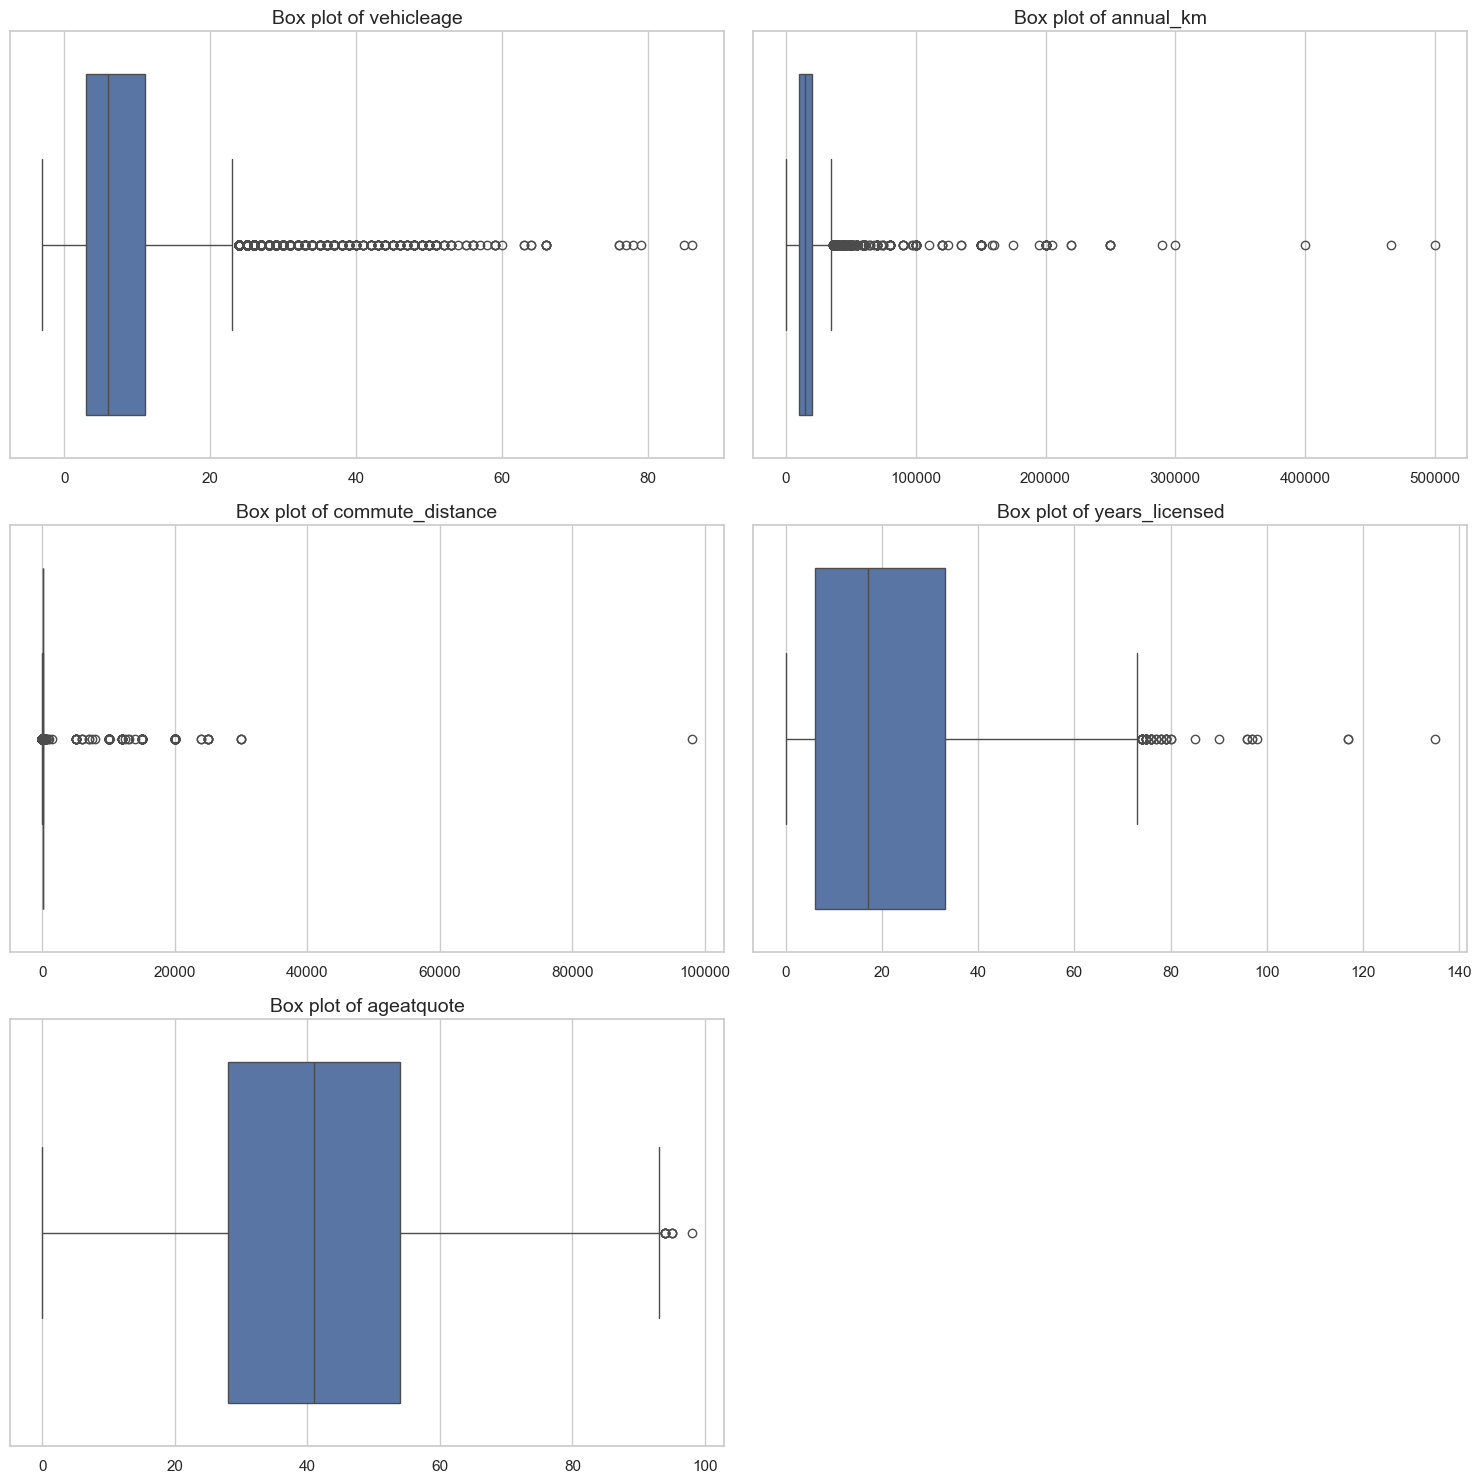

In [171]:
# Setting aesthetic style for better visualization
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = [
    'vehicleage',
    'annual_km',
    'commute_distance',
    'years_licensed',
    'ageatquote'
]

# Calculate number of rows needed for subplots if 2 columns per row
num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2  # add one more row if necessary to fit all plots

# Creating a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns and create a box plot for each
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=out_train_data[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# If the total plots are odd, hide the last subplot if not used
if num_plots % 2 != 0:
    axes[-1].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

* In vehicleyear we have decided a cut_off_year of 1992 where we have filtered out the rows where the vehicle year is less than the cutoff.

In [172]:
cutoff_age = 30

# Cap the values at the upper limit using the clip method
out_train_data['vehicleage'] = out_train_data['vehicleage'].clip(upper=cutoff_age)

* In annual_km, I have used 95% quantile as upperlimit and removed all the rows above that limit.

In [173]:
# Define an upper limit based on a percentile
upper_limit = out_train_data['annual_km'].quantile(0.95)

# Cap values at the 95th percentile
out_train_data['annual_km'] = out_train_data['annual_km'].clip(upper=upper_limit)

* We have made a threshold value of 250 kilometers for the daily commute and filtered out the data from the dataset which is more than 250 km

In [174]:
upper_limit = 250

# Cap the values at the upper limit using the clip method
out_train_data['commute_distance'] = out_train_data['commute_distance'].clip(upper=upper_limit)

* I have selected upper age limit for a driver to be 80yrs and used it to calculate year licensed by subtracting minimum age of driver that is 16 yrs so around 64 - 65 yrs. so i have remove outliers from years_licensed and ageatquote features accordingly.

In [175]:
max_licensed_limit = 65

# Cap 'years_licensed' at 75 using the clip method
out_train_data['years_licensed'] = out_train_data['years_licensed'].clip(upper=max_licensed_limit)

In [176]:
out_train_data = out_train_data[out_train_data['ageatquote'] >= 0]
max_age_limit = 80
# Cap 'ageatquote' at 90 using the clip method
out_train_data['ageatquote'] = out_train_data['ageatquote'].clip(upper=max_age_limit)

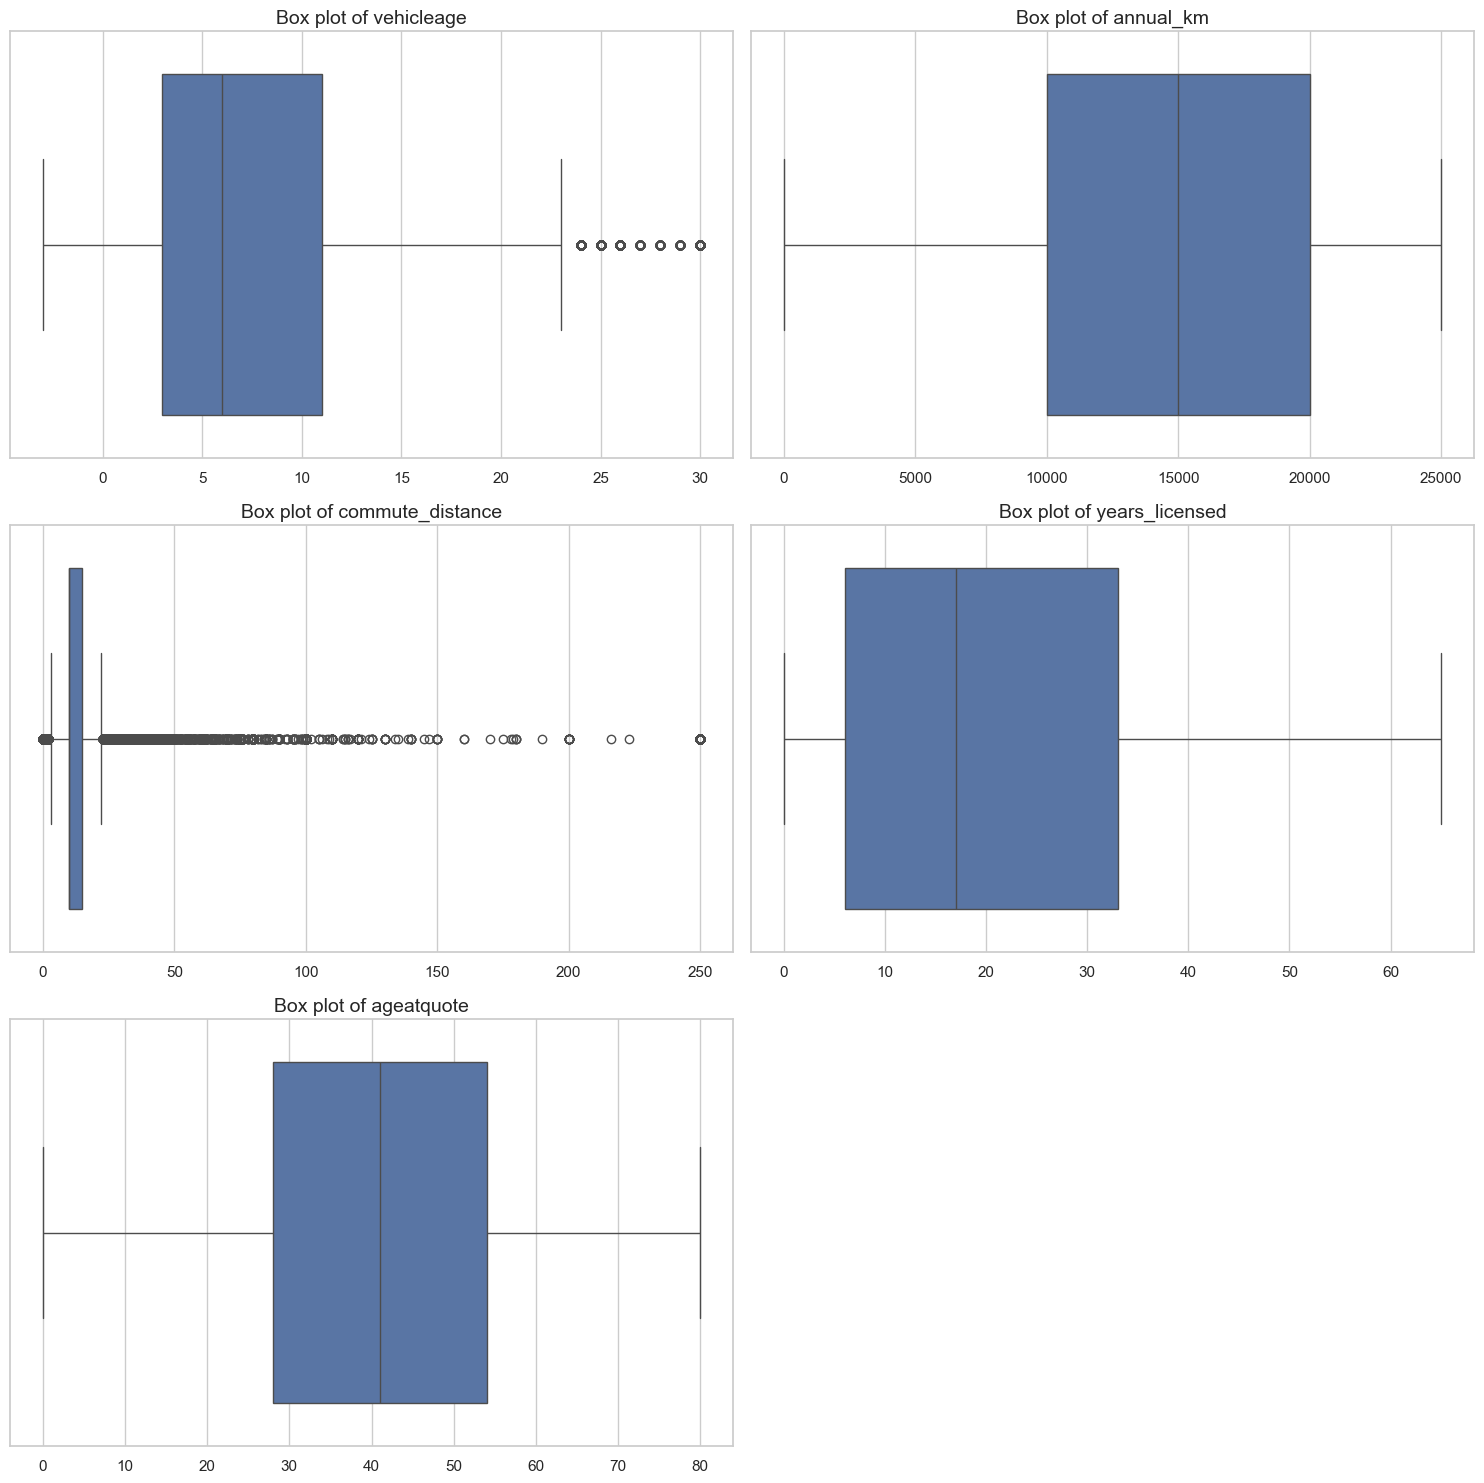

In [177]:
# Setting aesthetic style for better visualization
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = [
    'vehicleage',
    'annual_km',
    'commute_distance',
    'years_licensed',
    'ageatquote'
]

# Calculate number of rows needed for subplots if 2 columns per row
num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2  # add one more row if necessary to fit all plots

# Creating a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns and create a box plot for each
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=out_train_data[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# If the total plots are odd, hide the last subplot if not used
if num_plots % 2 != 0:
    axes[-1].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [178]:
combined_data = pd.concat([out_train_data, out_test_data], axis=0)

### Encoding Categorical Variables
* Now I am encoding categorical variables using one hot encoding.

In [179]:
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns

# Print the selected categorical columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['vehiclemake', 'vehicle_ownership', 'vehicleuse', 'gender', 'multi_product', 'marital_status', 'occupation', 'postal_region', 'area_region', 'consolidated_region']


In [180]:
unique_values_dict = {}

for col in categorical_cols:
    unique_values = combined_data[col].unique()
    unique_values_dict[col] = unique_values
    print(f"Unique values in {col}: {unique_values}")

Unique values in vehiclemake: ['VOLKSWAGEN' 'HYUNDAI' 'CHEVROLET' 'TOYOTA' 'HONDA' 'PONTIAC' 'KIA'
 'SMART' 'MAZDA' 'BUICK' 'FORD' 'LINCOLN' 'UNKNOWN' 'NISSAN' 'JEEP'
 'MERCEDES-BENZ' 'INFINITI' 'CHRYSLER' 'MINI' 'SUBARU' 'ACURA' 'BMW' 'GMC'
 'VOLVO' 'MERCURY' 'PORSCHE' 'LAND ROVER' 'DODGE' 'LEXUS' 'AUDI'
 'CADILLAC' 'SUZUKI' 'SATURN' 'BENTLEY' 'SAAB' 'OLDSMOBILE' 'MITSUBISHI'
 'FIAT' 'JAGUAR' 'SCION' 'LADA' 'MASERATI' 'ISUZU' 'YAMAHA' 'GEO' 'TESLA'
 'PLYMOUTH' 'LAMBORGHINI' 'KENWORTH' 'HINO' 'HUMMER' 'FREIGHTLINER'
 'ALFA ROMEO' 'FERRARI' 'COACHMEN' 'AMERICAN MOTORS' 'MOBILITY VENTURES'
 'ASTON MARTIN' 'TRIUMPH' 'FOREST RIVER' 'INTERNATIONAL' 'ROLLS-ROYCE'
 'HARLEY-DAVIDSON' 'MG' 'TRIPLE E' 'KTM' 'MCLAREN' 'AUSTIN-HEALEY'
 'BLUE BIRD' 'SKI-DOO' 'ROADTREK' 'BOMBARDIER' 'GULF STREAM' 'AM GENERAL'
 'AC' 'DAEWOO' 'JOHN DEERE' 'FISKER' 'ROYAL ENFIELD']
Unique values in vehicle_ownership: ['Owned' 'Unknown' 'Leased' 'Non-owned']
Unique values in vehicleuse: ['Pleasure' 'Business' 'Commute' 

In [181]:
# List of nominal features for one-hot encoding
categorical_cols

# Applying one-hot encoding
combined_data = pd.get_dummies(combined_data, columns=categorical_cols, drop_first=True)

In [182]:
combined_data.shape

(116999, 174)

* Separating train_data and test_data after data preprocessing.

In [256]:
# Dataset from Preprocessing
# Load and split data
train_data = combined_data[combined_data['marker'] == 1].copy()
test_data = combined_data[combined_data['marker'] == 0].copy()

# Drop marker and separate features/target
train_data.drop('marker', axis=1, inplace=True)
test_data.drop('marker', axis=1, inplace=True)
y_train = train_data['is_bound'].copy()
X_train = train_data.drop('is_bound', axis=1)

if 'is_bound' in test_data.columns:
    y_test = test_data['is_bound'].copy()
    X_test = test_data.drop('is_bound', axis=1)
else:
    X_test = test_data
    y_test = None

'''
No we have X_train (training df containing all the features except target variable), 
y_train (training df containing target variable) and test_data to work with.

'''

'\nNo we have X_train (training df containing all the features except target variable), \ny_train (training df containing target variable) and test_data to work with.\n\n'

## Models used in this project
We have used 2 Models for the modelling of data:
- Logistic Regression (Arpan Sharma)
- XGBoost (Harsh Tiwari)

## Modeling method 1
----

### Logistic Regression
----

In logistic regression, we model the probability that an input  X  belongs to the positive class ( y = 1 ) using the logistic function.
The logistic function is given by:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

The probability model is:

$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

Here, $\beta_0 $ is the intercept and $\beta_i $ are the coefficients for each feature $ X_i $. These coefficients quantify the influence of their corresponding features on the log-odds of the outcome, effectively determining the weight and direction (positive or negative impact) each feature has on the prediction.

**Logistic Regression** chosen because:
   - Binary classification problem
   - Need interpretable coefficients
   - Built-in feature selection through Elastic Net regularization
   - Probabilistic outputs for threshold tuning

#### Preprocessing and feature scaling
----

In [276]:
# Print initial data stats
print("Initial Data Statistics:")
print(f"Training samples: {len(X_train)}")
print(f"Features: {len(X_train.columns)}")
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Initial Data Statistics:
Training samples: 101885
Features: 172
Class distribution before SMOTE: Counter({0.0: 79593, 1.0: 22292})


##### Applying Scaling using Standardscaler and Resampling using SMOTE (Sinthetic Minority Over-sampling Technique)

---
* Here, we used StandardScaler from scikit-learn to normalize the training data (X_train) and scales the test data (X_test) based on the same parameters if y_test is not None.
* The scaled test data is then converted back into a pandas DataFrame with the same column names as X_test.

* Then, SMOTE was applied to handle the class imbalance in the training data.

* This ensured that both classes were equally represented, preventing the model from being biased towards the majority class.


In [277]:
# Feature Preprocessing
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the test data
X_test_scaled = scaler.transform(X_test) if y_test is not None else None
# Convert the scaled NumPy array to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Apply SMOTE and convert to DataFrame
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0.0: 79593, 1.0: 79593})


#### Model Training and Parameter Tuning
---

* In this section, we perform model training and hyperparameter tuning for a Logistic Regression model with **Elastic Net regularization** which is combination of L1(LASSO) and L2(RIDGE) regularizations. It shrinks some coefficients toward zero (like ridge regression) and set some coefficients to exactly zero (like lasso regression). We begin by splitting the resampled training data into separate training and validation sets to evaluate model performance. A grid search over a range of regularization strengths (Cs) and L1 ratios (l1_ratios) is conducted using cross-validation to identify the optimal hyperparameters. Finally, we extract and report the best cross-validation score along with the corresponding C value and l1_ratio.

In [278]:
# Model Training and Parameter Tuning

# Split into train and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_resampled, 
    y_train_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_train_resampled
)
print("\nSplit sizes:")
print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val_split.shape}")

# Setup model parameters with explanation
Cs = np.logspace(-7, -2, 20)  # Strong regularization range
l1_ratios = [0.9, 0.95, 0.99]  # High L1 ratios for feature selection

# Initialize and fit model
model_elastic = LogisticRegressionCV(
    Cs=Cs,
    cv=3,
    penalty='elasticnet',
    solver='saga',
    l1_ratios=l1_ratios,
    max_iter=2000,
    tol=1e-3,
    scoring='neg_log_loss',
    n_jobs=-1,
    random_state=42
)

print("\nFitting model with parameter grid:")
print(f"C values tested: {len(Cs)}")
print(f"L1 ratios tested: {l1_ratios}")
print(f"Total combinations: {len(Cs) * len(l1_ratios)}")

model_elastic.fit(X_train_split, y_train_split)

# Print detailed parameter tuning results
print("\nParameter Tuning Results:")
print(f"Optimal C value: {model_elastic.C_[0]:.6f}")
print(f"Optimal l1_ratio: {model_elastic.l1_ratio_[0]:.3f}")

# Compute mean scores over folds
mean_scores = model_elastic.scores_[1].mean(axis=0)

# Find the indices of the best score
best_score_idx = np.unravel_index(np.argmax(mean_scores), mean_scores.shape)

# Retrieve the best score
best_score = mean_scores[best_score_idx]

# Retrieve the optimal C and l1_ratio
optimal_C = Cs[best_score_idx[0]]
optimal_l1_ratio = l1_ratios[best_score_idx[1]]

print(f"\nBest CV Score: {best_score:.3f}")
print(f"Best C from mean scores: {optimal_C}")
print(f"Best l1_ratio from mean scores: {optimal_l1_ratio}")


Split sizes:
Training set: (127348, 172)
Validation set: (31838, 172)

Fitting model with parameter grid:
C values tested: 20
L1 ratios tested: [0.9, 0.95, 0.99]
Total combinations: 60

Parameter Tuning Results:
Optimal C value: 0.010000
Optimal l1_ratio: 0.900

Best CV Score: -0.660
Best C from mean scores: 0.01
Best l1_ratio from mean scores: 0.9


* The hyperparameter tuning process identified that the best model performance is achieved with a C value of 0.01 and an l1_ratio of 0.9. This configuration balances strong regularization with a high emphasis on L1 regularization, promoting sparsity by selecting the most relevant features. The negative log loss of -0.660 indicates that the model predicts the target variable with a reasonable level of certainty. Overall, the model is expected to generalize well on unseen data due to the effective regularization and feature selection provided by the optimal hyperparameters.

#### Feature Selection Analysis
---

- **Feature Reduction:** The model successfully reduced the original 172 features to 118 significant ones, enhancing model efficiency and interpretability.
- **Optimal Hyperparameters:** An optimal C value of 0.010000 and an l1_ratio of 0.900 were identified, indicating strong regularization with a high emphasis on L1 penalty to promote sparsity.
- **Top Influential Features:** The most impactful features include multi_product_Yes, ageatquote, and years_licensed, suggesting these variables have the strongest association with the target outcome. Positive coefficients indicate a direct relationship, while negative coefficients signify an inverse relationship with the target variable.

In [279]:
# Feature Selection Analysis
# Get selected features
coef = model_elastic.coef_[0]
selected_features = X_train_resampled.columns[abs(coef) > 1e-3].tolist()

# Print results
print(f"\nFeature Selection Results:")
print(f"Original features: {len(X_train.columns)}")
print(f"Number of features selected: {len(selected_features)}")
print(f"Optimal C value: {model_elastic.C_[0]:.6f}")
print(f"Optimal l1_ratio: {model_elastic.l1_ratio_[0]:.3f}")

print("\nTop 20 features by absolute coefficient value:")
coef_dict = dict(zip(X_train_resampled.columns, coef))
top_features = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
for feature, coef in top_features:
    print(f"{feature}: {coef:.4f}")    


Feature Selection Results:
Original features: 172
Number of features selected: 120
Optimal C value: 0.010000
Optimal l1_ratio: 0.900

Top 20 features by absolute coefficient value:
multi_product_Yes: 0.3433
ageatquote: -0.2995
years_licensed: 0.1770
consolidated_region_Atlantic: -0.1614
postal_region_Ontario_Southwest_Urban: 0.1459
postal_region_Ontario_East_Urban: 0.1246
area_region_Ontario_North: 0.0744
postal_region_Alberta_Urban: -0.0730
conviction_count_minor_3yrs: -0.0609
postal_region_Atlantic_NL_Urban: -0.0553
commute_distance: -0.0549
vehiclemake_FORD: 0.0446
marital_status_Single: 0.0434
conviction_count_major_3yrs: -0.0428
assigned_losses_pd_5yrs: -0.0387
vehicleuse_Pleasure: 0.0385
area_region_Unknown: -0.0340
postal_region_Atlantic_NB_Urban: -0.0330
area_region_West_BC: 0.0322
marital_status_Separated: 0.0315


#### Ispecting with validation data
---

* In this section, we proceed to train the Logistic Regression model using the optimal hyperparameters identified during cross-validation. We fit the model on the training data with the selected features to capture the most significant patterns. To enhance the reliability of the predicted probabilities, we apply probability calibration using the validation set. This calibration aligns the predicted probabilities with the true likelihoods, ensuring more accurate probability estimates for downstream evaluation.

In [280]:
# Model Training and Calibration
# Train final model
final_model = LogisticRegression(
    C=model_elastic.C_[0],
    penalty='elasticnet',
    solver='saga',
    l1_ratio=model_elastic.l1_ratio_[0],
    max_iter=2000
)
final_model.fit(X_train_split[selected_features], y_train_split)

# Calibrate probabilities
calibrated_model = CalibratedClassifierCV(final_model, cv='prefit')
calibrated_model.fit(X_val_split[selected_features], y_val_split)

# Get predictions
y_val_prob = calibrated_model.predict_proba(X_val_split[selected_features])

In [281]:
# Model Evaluation
# Calculate ROC curve and find EER threshold
fpr_curve, tpr_curve, roc_thresholds = roc_curve(y_val_split, y_val_prob[:, 1])
eer_threshold = find_eer_threshold(fpr_curve, tpr_curve, roc_thresholds)

# Get predictions using EER threshold
y_val_pred = (y_val_prob[:, 1] >= eer_threshold).astype(int)

# Calculate metrics
tn, fp, fn, tp = confusion_matrix(y_val_split, y_val_pred).ravel()
revenue = (5.50 * tp) - (1 * (tp + fp))
roc_auc = roc_auc_score(y_val_split, y_val_prob[:, 1])

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_val_split, y_val_prob[:, 1])
avg_precision = average_precision_score(y_val_split, y_val_prob[:, 1])

# Print comprehensive results
print("\nValidation Results Summary:")
print(f"ROC-AUC: The model achieved a ROC-AUC score of {roc_auc:.3f}, indicating moderate ability to distinguish between classes.")
print(f"Average Precision: With an average precision of {avg_precision:.3f}, the model shows reasonable precision-recall performance.")
print(f"Equal Error Rate Threshold: An EER threshold of {eer_threshold:.3f} was determined for balanced error rates.")
print(f"\nConfusion Matrix:")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"\nBusiness Metrics:")
print(f"Revenue: ${revenue:.2f}")
print(f"Cost per True Positive: ${(tp + fp)/tp:.2f}")
print(f"True Positive Rate: {tp/(tp+fn):.3f}")
print(f"False Positive Rate: {fp/(fp+tn):.3f}")


Validation Results Summary:
ROC-AUC: The model achieved a ROC-AUC score of 0.645, indicating moderate ability to distinguish between classes.
Average Precision: With an average precision of 0.613, the model shows reasonable precision-recall performance.
Equal Error Rate Threshold: An EER threshold of 0.509 was determined for balanced error rates.

Confusion Matrix:
True Positives: 9638
False Positives: 6281
True Negatives: 9638
False Negatives: 6281

Business Metrics:
Revenue: $37090.00
Cost per True Positive: $1.65
True Positive Rate: 0.605
False Positive Rate: 0.395


#### Model Performance Visualizations
---


* In the following sections, we will visualize the performance of our predictive model through three key graphs. The first graph illustrates the Receiver Operating Characteristic (ROC) curve, which helps us evaluate the trade-off between the true positive rate and false positive rate at various threshold settings. The second graph shows the Precision-Recall curve, providing insight into the relationship between recall and the precision of the model across different thresholds. Lastly, we examine the Revenue vs. Threshold graph, which plots the expected revenue generated at different classification thresholds, highlighting the financial impact of varying the decision boundary.

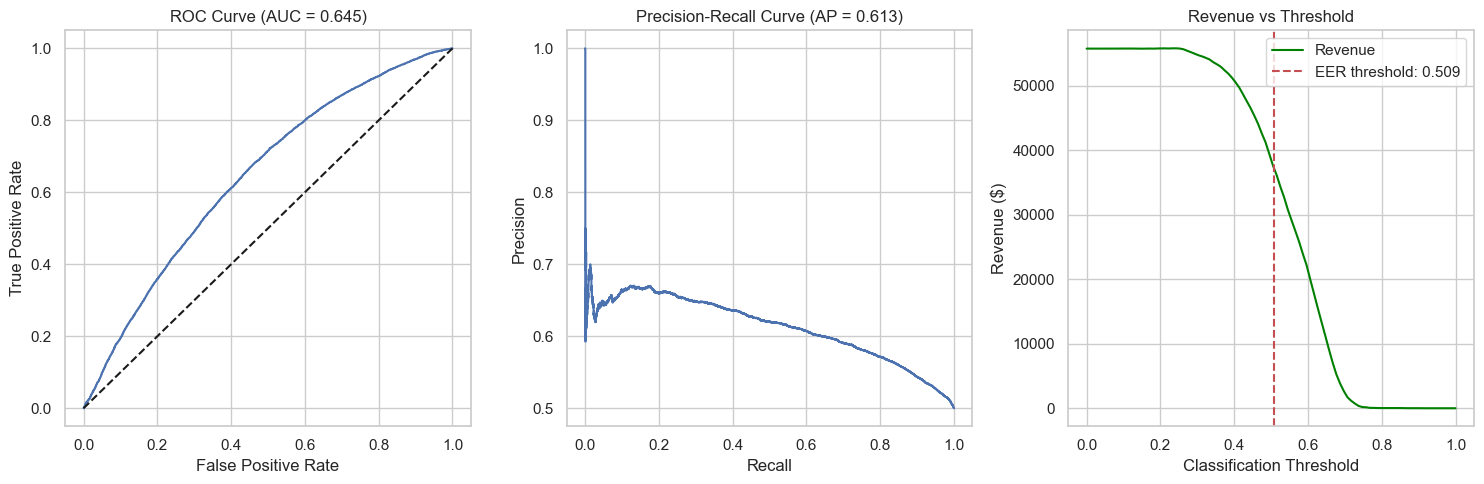

In [282]:
# Performance Visualizations
plt.figure(figsize=(15, 5))

# Plot 1: ROC Curve for model 1 
plt.subplot(131)
plt.plot(fpr_curve, tpr_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.3f})')
plt.grid(True)

# Plot 2: Precision-Recall Curve
plt.subplot(132)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.3f})')
plt.grid(True)

# Plot 3: Revenue vs Threshold
thresholds = np.linspace(0, 1, 100)
revenues = []
for threshold in thresholds:
    y_pred = (y_val_prob[:, 1] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val_split, y_pred).ravel()
    # Calculate Revenue
    revenue = (5.50 * tp) - (1 * (tp + fp))
    revenues.append(revenue)

plt.subplot(133)
plt.plot(thresholds, revenues, label='Revenue', color='green')
plt.axvline(x=eer_threshold, color='r', linestyle='--', 
            label=f'EER threshold: {eer_threshold:.3f}')

plt.xlabel('Classification Threshold')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [283]:
print("y_val_split shape:", y_val_split.shape)
print("Unique values in y_val_split:", np.unique(y_val_split))
print("y_pred shape:", y_pred.shape)
print("Unique values in y_pred:", np.unique(y_pred))

y_val_split shape: (31838,)
Unique values in y_val_split: [0. 1.]
y_pred shape: (31838,)
Unique values in y_pred: [0]


**Interpretation of Graphical Results**
1. **ROC Curve:** The ROC curve, with an Area Under the Curve (AUC) of 0.644, suggests that the model has moderate discriminatory ability. The AUC value indicates how well the model can distinguish between classes.
2. **Precision-Recall Curve:** The Precision-Recall curve shows an average precision (AP) of 0.611. This curve is particularly useful for evaluating models on imbalanced datasets. The graph reveals that precision starts to decrease as recall increases, which is typical but indicates the inherent challenge in balancing the capture of more positive cases (higher recall) against the need for maintaining the accuracy of these positive predictions (higher precision)
3.	**Revenue vs Threshold:** The Revenue vs Threshold graph demonstrates how varying the classification threshold impacts the generated revenue. The optimal revenue is achieved near the Equal Error Rate (EER) threshold of 0.508, beyond which the revenue sharply declines. This threshold balances the cost of false positives against the benefit of true positives, maximizing financial return.

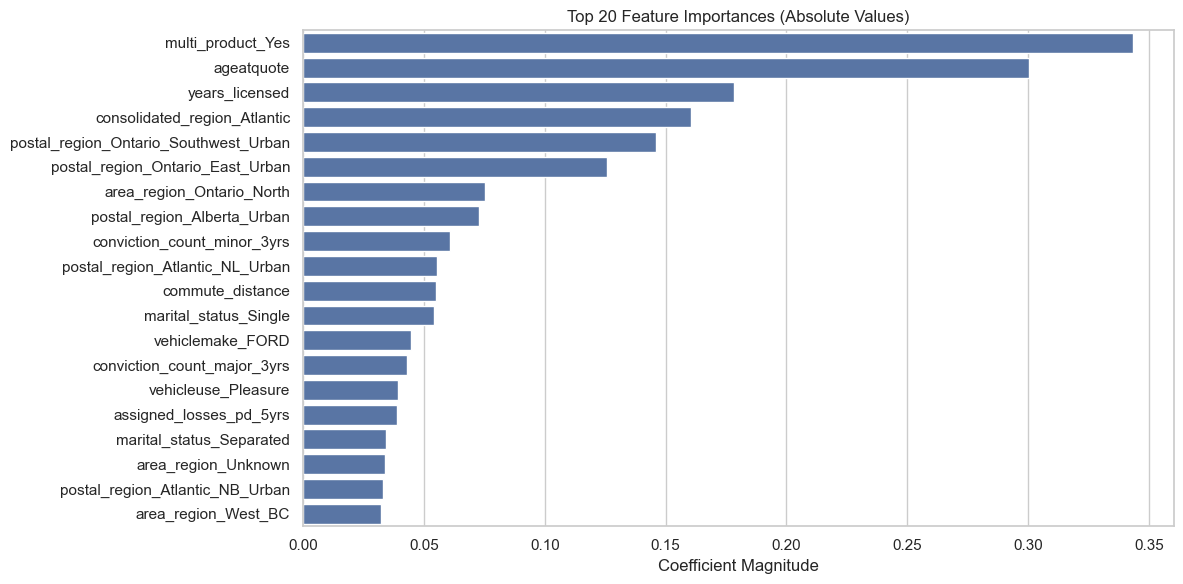

In [284]:
# Feature Importance Visualization
plt.figure(figsize=(12, 6))
coef_dict = dict(zip(selected_features, final_model.coef_[0]))
top_features = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
sns.barplot(x=[abs(x[1]) for x in top_features], 
           y=[x[0] for x in top_features])
plt.title('Top 20 Feature Importances (Absolute Values)')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

* The chart lists the top 20 features ranked by their absolute coefficient magnitudes obtained from a regression model. Higher values indicate a stronger influence on the model’s output. Each bar represents the elactic absolute coefficient magnitude, which quantifies the impact of each corresponding feature on the model’s predictions.

#### Model 1 Predictions
---

* **Final Model Training on Complete Dataset** 

    After identifying the optimal parameters and selected features through our validation process, we now proceed to train the final model on the complete training dataset. This approach maximizes the data available for training while maintaining the feature selection and parameter optimization insights gained from our validation steps. The model is then calibrated using 5-fold cross-validation to ensure robust probability estimates across different data subsets.

In [285]:
# Use X_train_resampled and y_train_resampled as SMOTE was applied to the full training data
X_full_train = X_train_resampled
y_full_train = y_train_resampled

# Ensure selected_features are from the full training data
selected_features = X_full_train.columns[abs(model_elastic.coef_[0]) > 1e-3].tolist()

# Retrain the final model on the full training data
final_model1 = LogisticRegression(
    C=model_elastic.C_[0],
    penalty='elasticnet',
    solver='saga',
    l1_ratio=model_elastic.l1_ratio_[0],
    max_iter=2000
)
final_model.fit(X_full_train[selected_features], y_full_train)

# Calibrate probabilities using cross-validation on the full training data
calibrated_model = CalibratedClassifierCV(final_model, cv=5)
calibrated_model.fit(X_full_train[selected_features], y_full_train)

CalibratedClassifierCV(cv=5,
                       estimator=LogisticRegression(C=0.01, l1_ratio=0.9,
                                                    max_iter=2000,
                                                    penalty='elasticnet',
                                                    solver='saga'))

* Making Predcition on test set using final model1 and selected features

In [286]:
# Prepare the test data (ensure it has the same preprocessing and features)
X_test_selected = X_test_scaled_df[selected_features]

# Get predictions on the test data
y_test_proba_model1 = calibrated_model.predict_proba(X_test_selected)[:, 1]
y_test_pred_model1_list = (y_test_proba_model1 >= eer_threshold).astype(int).tolist()  # Convert to list

In [287]:
# Write predictions to a Python file
with open('calculator.py', 'w') as file:
    file.write('def my_answer_list():\n    return ')
    file.write(str(y_test_pred_model1_list))
    file.write('\n')

# Confirm file has been written
print("File 'calculator.py' has been created with the function my_answer_list().")

File 'calculator.py' has been created with the function my_answer_list().


## Modelling Method 2
----

### XGBOOST(Extreme Gradient Boosting)
---

An Advanced Implimentation of gradient boosting solves our problem in three steps:
- Training Phase
- Prediction phase
- Decision Threshold

It's objective function is given by:
$$
\text{Obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$
Where,
$L(y_i,\hat{y}_i) $ is the binary logistic loss function, measuring the diffrence between actual and predicted probablities.

#### Preprocessing and feature scaling
---



- Here, we used StandardScaler from scikit-learn to normalize the training data (X_train) and scales the test data (X_test) based on the same parameters if y_test is not None.
- The scaled test data is then converted back into a pandas DataFrame with the same column names as X_test.
- Finally, the training data is split into new training and validation sets using a stratified approach based on the target variable y_train, with 20% of the data reserved for validation.

In [399]:
# Feature Preprocessing
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the test data
X_test_scaled = scaler.transform(X_test) if y_test is not None else None
# Convert the scaled NumPy array to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Apply SMOTE and convert to DataFrame
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Split into train and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_resampled, 
    y_train_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_train_resampled
)
print("\nSplit sizes:")
print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val_split.shape}")

Class distribution after SMOTE: Counter({0.0: 79593, 1.0: 79593})

Split sizes:
Training set: (127348, 172)
Validation set: (31838, 172)


#### Model Training and Parameter Tuning
---

* Finding the best parameters using Random Search CV. Random Search uses every possible combination using the parameter grid given to find the best possible set of parameters which will work on the validation set.

In [404]:
# Define the model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': np.arange(3, 10, 1),
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy', n_jobs=-1, cv=3,
                                   verbose=3, random_state=42)

warnings.filterwarnings('ignore')
# Fit the random search model
random_search.fit(X_train_split, y_train_split)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3] END learning_rate=0.3, max_depth=4, n_estimators=200, subsample=0.8;, score=0.849 total time=   5.2s
[CV 2/3] END learning_rate=0.3, max_depth=4, n_estimators=200, subsample=0.8;, score=0.847 total time=   5.4s
[CV 1/3] END learning_rate=0.3, max_depth=4, n_estimators=200, subsample=0.8;, score=0.850 total time=   5.6s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=0.849 total time=  10.6s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=0.848 total time=  10.7s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=0.851 total time=  10.8s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8;, score=0.850 total time=  14.0s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8;, score=0.849 total time=  14.1s
[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=4

In [405]:
# Print the comprehensive results
print("\nModel Optimization Results")
print("==========================")
print(f"\nBest Parameters Found:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: ${random_search.best_score_:.2f}")

# Get predictions using best model
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val_split)

# Calculate and display business metrics
tn, fp, fn, tp = confusion_matrix(y_val_split, y_val_pred).ravel()
revenue = (5.50 * tp) - (1 * (tp + fp))

print("\nValidation Set Performance")
print("=========================")
print(f"Revenue: ${revenue:.2f}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"Cost per True Positive: ${(tp + fp)/tp:.2f}")


Model Optimization Results

Best Parameters Found:
subsample: 1.0
n_estimators: 400
max_depth: 3
learning_rate: 0.3

Best Cross-Validation Score: $0.85

Validation Set Performance
Revenue: $51243.50
True Positives: 11459
False Positives: 322
True Negatives: 15597
False Negatives: 4460
Cost per True Positive: $1.03


In [406]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Initialize XGBoost classifier with optimized parameters
xgb_model = xgb.XGBClassifier(
    subsample=0.8,           # Optimal value from tuning
    n_estimators=400,        # Optimal value from tuning
    max_depth=9,             # Optimal value from tuning
    learning_rate=0.3,       # Optimal value from tuning
    gamma=0.1,               # Optimal value from tuning
    colsample_bytree=0.8,    # Optimal value from tuning
    min_child_weight=1,      # Optimal value from tuning
    eval_metric='logloss',       # Changed to AUC as it better reflects our business objective
    objective='binary:logistic',
    scale_pos_weight=2,       # Added to handle class imbalance
    random_state=42          # For reproducibility
)

# Fit the model on the training data
xgb_model.fit(X_train_split, y_train_split)

# Generate probability predictions for validation set
y_val_prob1 = xgb_model.predict_proba(X_val_split)

# # Calculate and print performance metrics
# y_val_pred = (y_val_prob1[:, 1] >= 0.5).astype(int)  # Using 0.5 as default threshold
# tn, fp, fn, tp = confusion_matrix(y_val_split, y_val_pred).ravel()
# revenue = (5.50 * tp) - (1 * (tp + fp))

# print("\nModel Performance Metrics:")
# print(f"Revenue: ${revenue:.2f}")
# print(f"True Positives: {tp}")
# print(f"False Positives: {fp}")
# print(f"Cost per True Positive: ${(tp + fp)/tp:.2f}")

In [407]:
# Model Evaluation
# Calculate ROC curve and find EER threshold
fpr_curve, tpr_curve, roc_thresholds = roc_curve(y_val_split, y_val_prob1[:, 1])
eer_threshold = find_eer_threshold(fpr_curve, tpr_curve, roc_thresholds)

# Get predictions using EER threshold
y_val_pred = (y_val_prob1[:, 1] >= eer_threshold).astype(int)

# Calculate metrics
tn, fp, fn, tp = confusion_matrix(y_val_split, y_val_pred).ravel()
revenue = (5.50 * tp) - (1 * (tp + fp))
roc_auc = roc_auc_score(y_val_split, y_val_prob1[:, 1])

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_val_split, y_val_prob1[:, 1])
avg_precision = average_precision_score(y_val_split, y_val_prob1[:, 1])

# Print comprehensive results
print("\nValidation Results Summary:")
print(f"ROC-AUC: The model achieved a ROC-AUC score of {roc_auc:.3f}, indicating moderate ability to distinguish between classes.")
print(f"Average Precision: With an average precision of {avg_precision:.3f}, the model shows reasonable precision-recall performance.")
print(f"Equal Error Rate Threshold: An EER threshold of {eer_threshold:.3f} was determined for balanced error rates.")
print(f"\nConfusion Matrix:")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"\nBusiness Metrics:")
print(f"Revenue: ${revenue:.2f}")
print(f"Cost per True Positive: ${(tp + fp)/tp:.2f}")
print(f"True Positive Rate: {tp/(tp+fn):.3f}")
print(f"False Positive Rate: {fp/(fp+tn):.3f}")


Validation Results Summary:
ROC-AUC: The model achieved a ROC-AUC score of 0.896, indicating moderate ability to distinguish between classes.
Average Precision: With an average precision of 0.926, the model shows reasonable precision-recall performance.
Equal Error Rate Threshold: An EER threshold of 0.452 was determined for balanced error rates.

Confusion Matrix:
True Positives: 12901
False Positives: 3018
True Negatives: 12901
False Negatives: 3018

Business Metrics:
Revenue: $55036.50
Cost per True Positive: $1.23
True Positive Rate: 0.810
False Positive Rate: 0.190


In [411]:
# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
false_positive_rates = []
false_negative_rates = []
revenues = []

# Calculate FPR, FNR, and revenue for each threshold
for threshold in thresholds:
    y_pred = (y_val_prob1[:, 1] >= threshold).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_val_split[:len(y_pred)], y_pred).ravel()

    # Calculate false positive rate and false negative rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    # Append FPR and FNR to lists
    false_positive_rates.append(fpr)
    false_negative_rates.append(fnr)

    # Calculate revenue: (5.5 * True Positives) - (1 * Predicted Positives)
    revenue = (5.5 * tp) - (1 * (tp + fp))
    revenues.append(revenue)
print(f"Equal Error Point (EEP) Threshold: {eer_threshold:.2f}")

Equal Error Point (EEP) Threshold: 0.45


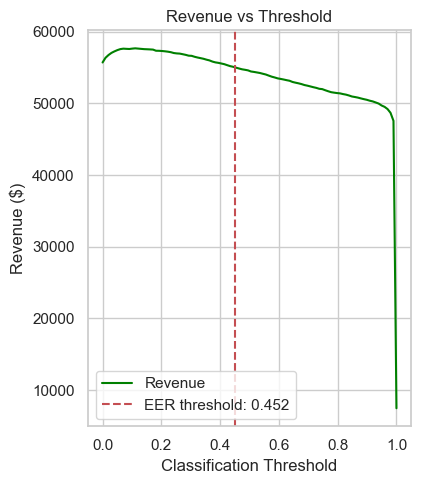

In [409]:
# Create main plot
plt.figure(figsize=(12, 5))
# Plot Revenue vs Threshold
thresholds = np.linspace(0, 1, 100)
revenues = []
for threshold in thresholds:
    y_pred = (y_val_prob1[:, 1] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val_split, y_pred).ravel()
    # Calculate Revenue
    revenue = (5.50 * tp) - (1 * (tp + fp))
    revenues.append(revenue)

plt.subplot(133)
plt.plot(thresholds, revenues, label='Revenue', color='green')
plt.axvline(x=eer_threshold, color='r', linestyle='--', 
            label=f'EER threshold: {eer_threshold:.3f}')

plt.xlabel('Classification Threshold')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Model 1 Predictions
---

* **Final Model training on complete dataset**

    After identifying the optimal parameters through our validation process, we now proceed to train the final model on the complete training dataset. This approach maximizes the data available for training while maintaining the parameter optimization insights gained from our validation steps.

In [410]:
# Use X_train_resampled and y_train_resampled as SMOTE was applied to the full training data
X_full_train = X_train_resampled
y_full_train = y_train_resampled
# Initialize XGBoost classifier with optimized parameters
final_model2 = xgb.XGBClassifier(
    subsample=0.8,           # Optimal value from tuning
    n_estimators=400,        # Optimal value from tuning
    max_depth=9,             # Optimal value from tuning
    learning_rate=0.3,       # Optimal value from tuning
    gamma=0.1,               # Optimal value from tuning
    colsample_bytree=0.8,    # Optimal value from tuning
    min_child_weight=1,      # Optimal value from tuning
    eval_metric='auc',       # Changed to AUC as it better reflects our business objective
    objective='binary:logistic',
    random_state=42          # For reproducibility
)

# Training the model on the complete dataset
final_model2.fit(X_full_train, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [413]:
y_pred = final_model2.predict(X_test_scaled_df)

# threshold = 0.34

# Apply the threshold to determine class predictions
y_pred_test = (y_pred >= eer_threshold).astype(int).tolist()

In [414]:
# Write predictions to a Python file
with open('calculator.py', 'w') as file:
    file.write('def my_answer_list():\n    return ')
    file.write(str(y_pred_test))
    file.write('\n')

# Confirm file has been written
print("File 'calculator.py' has been created with the function my_answer_list().")

File 'calculator.py' has been created with the function my_answer_list().


## Comparing the methods by looking at ROC curves

In [344]:
# Now you can predict probabilities on your calidation set and test set
y_probs_val = xgb_model.predict_proba(X_val_splitgb)

In [382]:
fpr_lr, tpr_lr, roc_thresholds_lr = roc_curve(y_val_split, y_val_prob[:, 1])
fpr_xgb, tpr_xgb, roc_thresholds_xgb = roc_curve(y_val_split, y_val_prob1[:, 1])

auc_lr = auc(fpr_lr, tpr_lr)
auc_xgb = auc(fpr_xgb, tpr_xgb)

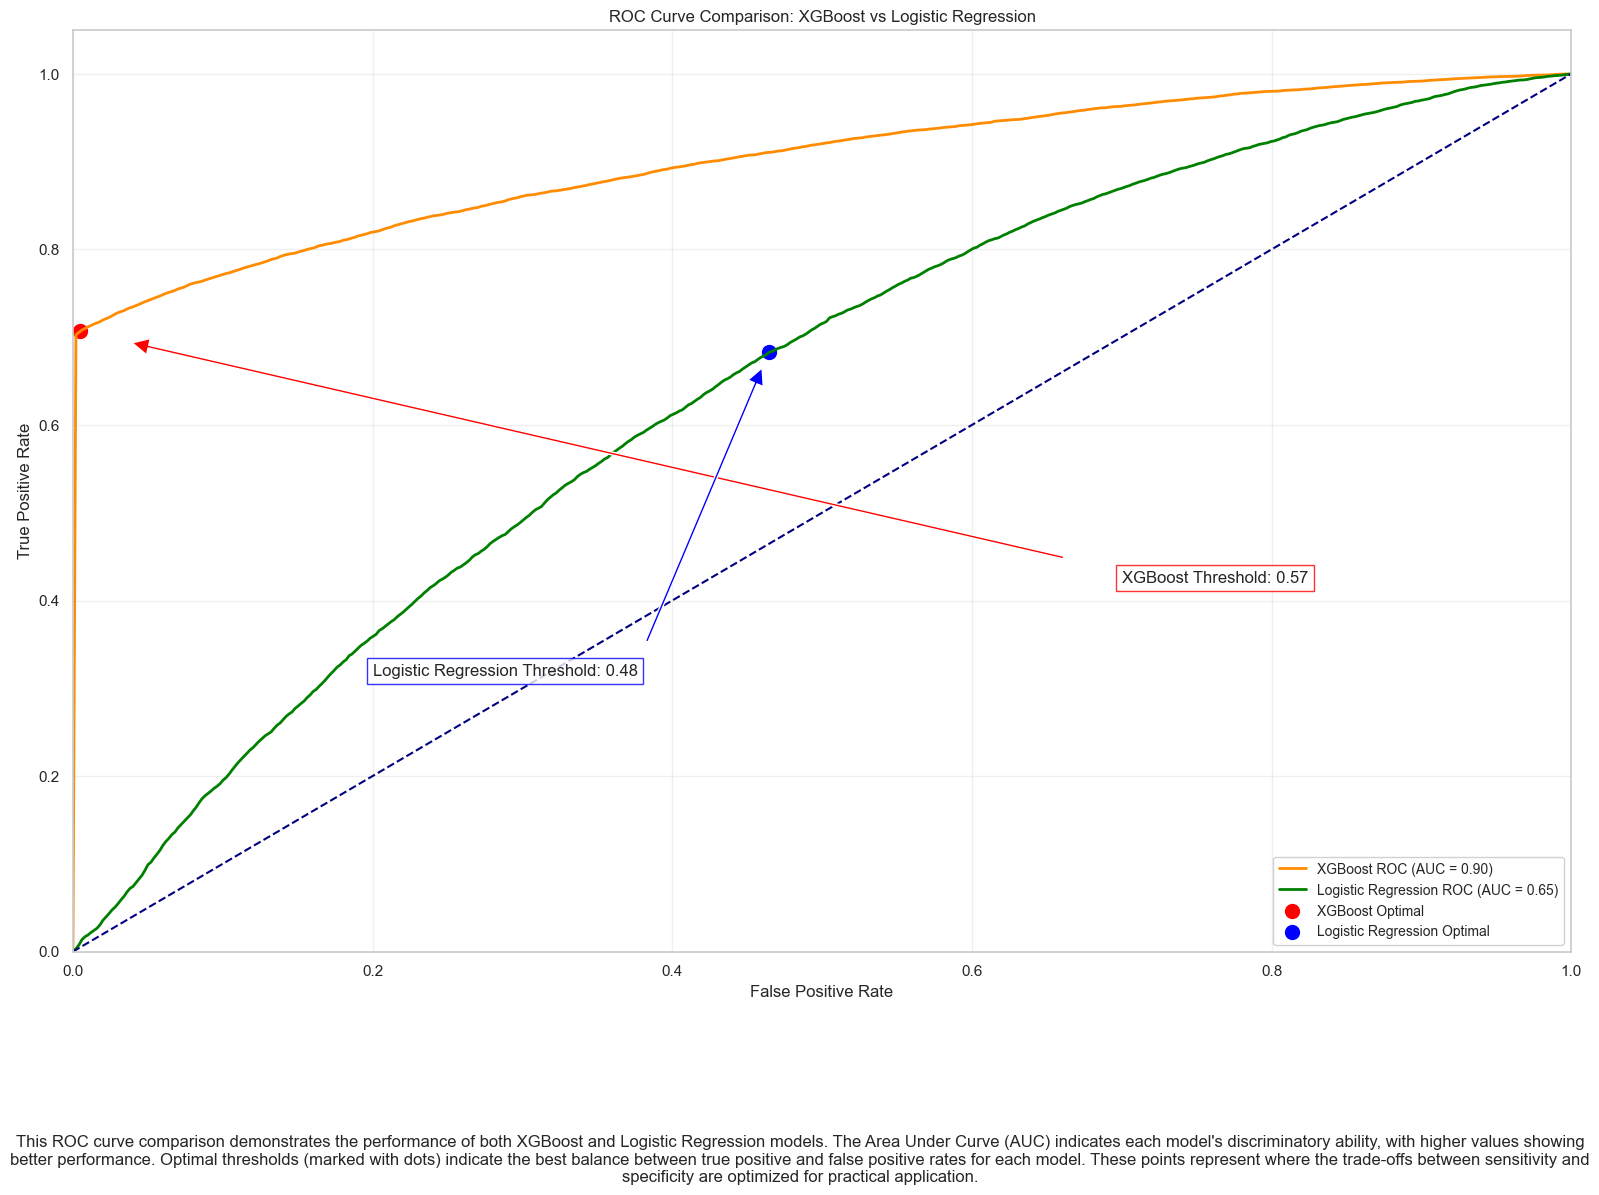

In [383]:
from scipy.interpolate import interp1d

def create_smooth_roc_curve(fpr, tpr):
    indices = np.unique(fpr, return_index=True)[1]
    fpr_unique = fpr[np.sort(indices)]
    tpr_unique = tpr[np.sort(indices)]
    
    interpolator = interp1d(fpr_unique, tpr_unique, kind='linear')
    fpr_smooth = np.linspace(fpr_unique.min(), fpr_unique.max(), 500)
    tpr_smooth = interpolator(fpr_smooth)
    
    return fpr_smooth, tpr_smooth

# Create smooth curves
fpr_smooth_xgb, tpr_smooth_xgb = create_smooth_roc_curve(fpr_xgb, tpr_xgb)
fpr_smooth_lr, tpr_smooth_lr = create_smooth_roc_curve(fpr_lr, tpr_lr)

# Create main plot
plt.figure(figsize=(16, 12))

# Plot ROC curves
plt.plot(fpr_smooth_xgb, tpr_smooth_xgb, color='darkorange', lw=2, 
         label=f'XGBoost ROC (AUC = {auc_xgb:.2f})')
plt.plot(fpr_smooth_lr, tpr_smooth_lr, color='green', lw=2, 
         label=f'Logistic Regression ROC (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: XGBoost vs Logistic Regression')

# Add optimal threshold points with better positioned annotations
# XGBoost optimal point
xgb_opt_idx = np.argmax(tpr_xgb - fpr_xgb)
plt.scatter(fpr_xgb[xgb_opt_idx], tpr_xgb[xgb_opt_idx], 
           color='red', s=100, label='XGBoost Optimal')

# Position XGBoost annotation to the right
plt.annotate(f'XGBoost Threshold: {roc_thresholds_xgb[xgb_opt_idx]:.2f}',
            xy=(fpr_xgb[xgb_opt_idx], tpr_xgb[xgb_opt_idx]),
            xytext=(0.7, 0.4),  # Moved to right side
            textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width=2),
            fontsize=12, 
            bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))

# Logistic Regression optimal point
lr_opt_idx = np.argmax(tpr_lr - fpr_lr)
plt.scatter(fpr_lr[lr_opt_idx], tpr_lr[lr_opt_idx], 
           color='blue', s=100, label='Logistic Regression Optimal')

# Position Logistic Regression annotation to the left
plt.annotate(f'Logistic Regression Threshold: {roc_thresholds_lr[lr_opt_idx]:.2f}',
            xy=(fpr_lr[lr_opt_idx], tpr_lr[lr_opt_idx]),
            xytext=(0.2, 0.3),  # Moved to left side
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05, width=2),
            fontsize=12,
            bbox=dict(facecolor='white', edgecolor='blue', alpha=0.8))

# Add caption
caption_text = (
    "This ROC curve comparison demonstrates the performance of both XGBoost and Logistic Regression models. "
    "The Area Under Curve (AUC) indicates each model's discriminatory ability, with higher values showing better performance. "
    "Optimal thresholds (marked with dots) indicate the best balance between true positive and false positive rates for each model. "
    "These points represent where the trade-offs between sensitivity and specificity are optimized for practical application."
)
plt.figtext(0.5, 0.01, caption_text, wrap=True, horizontalalignment='center', fontsize=12)

# Add legend and grid
plt.legend(loc='lower right', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)

# Adjust layout to prevent caption overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

Visulisation of the Receiver Operating Characteristic (ROC) curve for a machine learning model's predictions:

- It uses the predict_proba method of the xgb_model to compute probabilities of the positive class, calculates the False Positive Rate (FPR) and True Positive Rate (TPR) using roc_curve based on validation targets y_val.
- It computes the Area Under the Curve (AUC) as a single value metric summarizing the overall ability of the model to discriminate between the positive and negative classes.
- The ROC curve is plotted with a line representing the ROC curve labeled with the AUC value, alongside a diagonal line that represents a no-skill classifier, using matplotlib for visualization.

## Leaderboard Score for Model 1
| Metric                                 | Model 1 | Model 2 |
|----------------------------------------|---------|---------|
| Test Set Accuracy (%)                  | 58      | 59      |
| Test Set False Negative Rate (%)       | 42      | 37      |
| Test Set False Positive Rate (%)       | 40      | 40      |
| Advertising Revenue (Cents Per Person) | 13      | 18      |